In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from importlib import reload
from filtering.filtering import kf
from filtering.filtering import particle_filter as pf

In [3]:
aapl = np.log(pd.read_csv('./data/AAPL.csv').Close.rename('AAPL'))
amzn = np.log(pd.read_csv('./data/AMZN.csv').Close.rename('AMZN'))
fb = np.log(pd.read_csv('./data/FB.csv').Close.rename('FB'))
msft = np.log(pd.read_csv('./data/MSFT.csv').Close.rename('MSFT'))

Text(0, 0.5, 'log price')

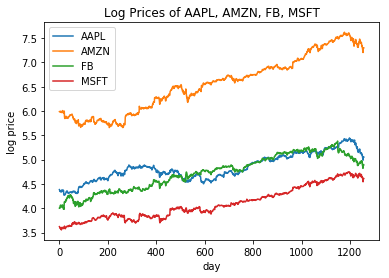

In [4]:
pd.concat([aapl, amzn, fb, msft],axis=1).plot()
plt.title('Log Prices of AAPL, AMZN, FB, MSFT')
plt.xlabel('day')
plt.ylabel('log price')
# plt.savefig('./report/figs/tech_price')

# Initialize UKF filters

In [5]:
# hyperparams
dt = 1/252
mu = (-0.4, 0.4)
kappa = (1e-3, 9)
theta = (1e-3, 1)
sigma = (1e-3, 1)
rho = (-1, 1)
v0 = (1e-3, 0.8)

In [6]:
bounds = [mu, kappa, theta, sigma, rho, v0]
init_params = [(a+b)/2 for a, b in bounds]

In [7]:
ukf_aapl = kf.UKFHeston(aapl.as_matrix(), dt=dt, is_log=True)
ukf_amzn = kf.UKFHeston(amzn.as_matrix(), dt=dt, is_log=True)
ukf_fb = kf.UKFHeston(fb.as_matrix(), dt=dt, is_log=True)
ukf_msft = kf.UKFHeston(msft.as_matrix(), dt=dt, is_log=True)

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing 

In [8]:
maxiter=2500

In [9]:
aapl = aapl.as_matrix()
amzn = amzn.as_matrix()
fb = fb.as_matrix()
msft = msft.as_matrix()

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Mason/Desktop/Columbia/computational-methods-in-finance/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing 

In [10]:
aapl_opt = ukf_aapl.optimize(init_params, maxiter=maxiter)

[0.     4.5005 0.5005 0.5005 0.     0.4005]
[2.5000e-04 4.5005e+00 5.0050e-01 5.0050e-01 0.0000e+00 4.0050e-01]
[0.       4.725525 0.5005   0.5005   0.       0.4005  ]
[0.       4.5005   0.525525 0.5005   0.       0.4005  ]
[0.       4.5005   0.5005   0.525525 0.       0.4005  ]
[0.0000e+00 4.5005e+00 5.0050e-01 5.0050e-01 2.5000e-04 4.0050e-01]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
[8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
i: 1
x_i: [8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
[8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
f_i: -7.310442283447074
[1.11111111e-04 4.30047778e+00 4.92158333e-01 5.11622222e-01
 1.11111111e-04 4.09400000e-01]
i: 2
x_i: [8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]


i: 22
x_i: [ 2.81140650e-04  4.37384407e+00  4.55941820e-01  5.26234224e-01
 -8.15410917e-05  4.49593015e-01]
[ 2.81140650e-04  4.37384407e+00  4.55941820e-01  5.26234224e-01
 -8.15410917e-05  4.49593015e-01]
f_i: -7.4022331200256115
[ 2.99069575e-04  4.41910289e+00  4.54268291e-01  4.99519210e-01
 -1.82983519e-04  4.57718205e-01]
i: 23
x_i: [ 2.81140650e-04  4.37384407e+00  4.55941820e-01  5.26234224e-01
 -8.15410917e-05  4.49593015e-01]
[ 2.81140650e-04  4.37384407e+00  4.55941820e-01  5.26234224e-01
 -8.15410917e-05  4.49593015e-01]
f_i: -7.4022331200256115
[ 2.78411830e-04  4.43067804e+00  4.52426362e-01  5.17711933e-01
 -1.41422760e-04  4.43032108e-01]
[ 3.04539552e-04  4.40204202e+00  4.59931307e-01  5.07765567e-01
 -9.09908573e-05  4.50000959e-01]
i: 24
x_i: [ 2.81140650e-04  4.37384407e+00  4.55941820e-01  5.26234224e-01
 -8.15410917e-05  4.49593015e-01]
[ 2.81140650e-04  4.37384407e+00  4.55941820e-01  5.26234224e-01
 -8.15410917e-05  4.49593015e-01]
f_i: -7.4022331200256115
[

[ 3.20838426e-04  4.86914675e+00  4.68328545e-01  6.49448492e-01
 -7.74657003e-04  4.51373005e-01]
i: 44
x_i: [ 3.09582296e-04  4.90175908e+00  4.68387096e-01  6.95146760e-01
 -9.05387658e-04  4.57995914e-01]
[ 3.09582296e-04  4.90175908e+00  4.68387096e-01  6.95146760e-01
 -9.05387658e-04  4.57995914e-01]
f_i: -7.414225179094655
[ 2.60602043e-04  5.09352736e+00  4.74044224e-01  7.13312834e-01
 -9.93611082e-04  4.48863079e-01]
[ 1.92128056e-04  5.25702897e+00  4.79219945e-01  7.53274704e-01
 -1.10854644e-03  4.43967427e-01]
i: 45
x_i: [ 2.60602043e-04  5.09352736e+00  4.74044224e-01  7.13312834e-01
 -9.93611082e-04  4.48863079e-01]
[ 2.60602043e-04  5.09352736e+00  4.74044224e-01  7.13312834e-01
 -9.93611082e-04  4.48863079e-01]
f_i: -7.4146106468127755
[ 3.10614149e-04  5.03800587e+00  4.73960320e-01  7.21637914e-01
 -1.02440837e-03  4.45580209e-01]
i: 46
x_i: [ 2.60602043e-04  5.09352736e+00  4.74044224e-01  7.13312834e-01
 -9.93611082e-04  4.48863079e-01]
[ 2.60602043e-04  5.0935273

[ 3.35448582e-04  4.76297253e+00  4.67462327e-01  6.91621418e-01
 -6.94823679e-04  4.53721425e-01]
i: 64
x_i: [ 3.26790339e-04  4.83433116e+00  4.68972479e-01  7.00006307e-01
 -7.70432124e-04  4.51067904e-01]
[ 3.26790339e-04  4.83433116e+00  4.68972479e-01  7.00006307e-01
 -7.70432124e-04  4.51067904e-01]
f_i: -7.416759135726888
[ 3.32675024e-04  4.68996804e+00  4.66577402e-01  6.88036528e-01
 -6.07061370e-04  4.51239877e-01]
[ 3.36013201e-04  4.73001170e+00  4.67356339e-01  6.92788091e-01
 -6.57463423e-04  4.51697753e-01]
i: 65
x_i: [ 3.36013201e-04  4.73001170e+00  4.67356339e-01  6.92788091e-01
 -6.57463423e-04  4.51697753e-01]
[ 3.36013201e-04  4.73001170e+00  4.67356339e-01  6.92788091e-01
 -6.57463423e-04  4.51697753e-01]
f_i: -7.416775982824471
[ 3.40089376e-04  4.75716208e+00  4.67425673e-01  7.05017311e-01
 -7.46508943e-04  4.55275737e-01]
i: 66
x_i: [ 3.36013201e-04  4.73001170e+00  4.67356339e-01  6.92788091e-01
 -6.57463423e-04  4.51697753e-01]
[ 3.36013201e-04  4.73001170

f_i: -7.417217653509577
[ 3.33109564e-04  4.74252255e+00  4.67536711e-01  6.98708808e-01
 -6.87944936e-04  4.53100489e-01]
i: 84
x_i: [ 3.37775199e-04  4.70504520e+00  4.67028120e-01  7.00252079e-01
 -6.58098414e-04  4.53460461e-01]
[ 3.37775199e-04  4.70504520e+00  4.67028120e-01  7.00252079e-01
 -6.58098414e-04  4.53460461e-01]
f_i: -7.417217653509577
[ 3.36605258e-04  4.72619979e+00  4.67419394e-01  6.98688262e-01
 -6.61505741e-04  4.52907249e-01]
i: 85
x_i: [ 3.37775199e-04  4.70504520e+00  4.67028120e-01  7.00252079e-01
 -6.58098414e-04  4.53460461e-01]
[ 3.37775199e-04  4.70504520e+00  4.67028120e-01  7.00252079e-01
 -6.58098414e-04  4.53460461e-01]
f_i: -7.417217653509577
[ 3.37301088e-04  4.71498909e+00  4.67304401e-01  7.00402384e-01
 -6.63857709e-04  4.53384588e-01]
i: 86
x_i: [ 3.37775199e-04  4.70504520e+00  4.67028120e-01  7.00252079e-01
 -6.58098414e-04  4.53460461e-01]
[ 3.37775199e-04  4.70504520e+00  4.67028120e-01  7.00252079e-01
 -6.58098414e-04  4.53460461e-01]
f_i:

[ 3.32623000e-04  4.72670780e+00  4.67256596e-01  6.99548480e-01
 -6.83241694e-04  4.52641095e-01]
i: 106
x_i: [ 3.32639825e-04  4.72256733e+00  4.67265370e-01  6.99773154e-01
 -6.75294424e-04  4.52661536e-01]
[ 3.32639825e-04  4.72256733e+00  4.67265370e-01  6.99773154e-01
 -6.75294424e-04  4.52661536e-01]
f_i: -7.417262893060259
[ 3.30584058e-04  4.72976758e+00  4.67531483e-01  6.99461645e-01
 -6.74476195e-04  4.51988982e-01]
[ 3.33301180e-04  4.71565922e+00  4.67192081e-01  7.00123259e-01
 -6.66609441e-04  4.52894706e-01]
i: 107
x_i: [ 3.32639825e-04  4.72256733e+00  4.67265370e-01  6.99773154e-01
 -6.75294424e-04  4.52661536e-01]
[ 3.32639825e-04  4.72256733e+00  4.67265370e-01  6.99773154e-01
 -6.75294424e-04  4.52661536e-01]
f_i: -7.417262893060259
[ 3.32936607e-04  4.73692078e+00  4.67514421e-01  6.99413842e-01
 -6.82233632e-04  4.52629818e-01]
[ 3.32396188e-04  4.71430561e+00  4.67218626e-01  7.00096846e-01
 -6.64676914e-04  4.52637837e-01]
i: 108
x_i: [ 3.32639825e-04  4.72256

f_i: -7.417375105228477
[ 3.27497765e-04  4.67177068e+00  4.65988219e-01  7.00183240e-01
 -6.57659095e-04  4.52065651e-01]
[ 3.25304200e-04  4.66398929e+00  4.65715936e-01  7.00358489e-01
 -6.58484671e-04  4.51811712e-01]
i: 128
x_i: [ 3.25304200e-04  4.66398929e+00  4.65715936e-01  7.00358489e-01
 -6.58484671e-04  4.51811712e-01]
[ 3.25304200e-04  4.66398929e+00  4.65715936e-01  7.00358489e-01
 -6.58484671e-04  4.51811712e-01]
f_i: -7.41738297074921
[ 3.22186552e-04  4.64320760e+00  4.65357741e-01  7.00071542e-01
 -6.39095459e-04  4.51789918e-01]
[ 3.16168263e-04  4.61335154e+00  4.64635896e-01  7.00083338e-01
 -6.23368262e-04  4.51389940e-01]
i: 129
x_i: [ 3.22186552e-04  4.64320760e+00  4.65357741e-01  7.00071542e-01
 -6.39095459e-04  4.51789918e-01]
[ 3.22186552e-04  4.64320760e+00  4.65357741e-01  7.00071542e-01
 -6.39095459e-04  4.51789918e-01]
f_i: -7.417388266014281
[ 3.17036059e-04  4.67532569e+00  4.66080283e-01  6.99801895e-01
 -6.51718445e-04  4.51153374e-01]
i: 130
x_i: [ 

[ 3.31750076e-04  4.66872591e+00  4.65227375e-01  7.00008041e-01
 -6.93831372e-04  4.52028014e-01]
i: 149
x_i: [ 3.27403845e-04  4.66815749e+00  4.65367338e-01  7.00038426e-01
 -6.84019499e-04  4.51785032e-01]
[ 3.27403845e-04  4.66815749e+00  4.65367338e-01  7.00038426e-01
 -6.84019499e-04  4.51785032e-01]
f_i: -7.417428176906308
[ 3.19278940e-04  4.66102271e+00  4.65311020e-01  6.99907041e-01
 -6.71200642e-04  4.51096564e-01]
i: 150
x_i: [ 3.27403845e-04  4.66815749e+00  4.65367338e-01  7.00038426e-01
 -6.84019499e-04  4.51785032e-01]
[ 3.27403845e-04  4.66815749e+00  4.65367338e-01  7.00038426e-01
 -6.84019499e-04  4.51785032e-01]
f_i: -7.417428176906308
[ 3.21506841e-04  4.63954631e+00  4.64678453e-01  7.00052861e-01
 -6.66769200e-04  4.51529676e-01]
[ 3.22913543e-04  4.67427778e+00  4.65682230e-01  7.00016441e-01
 -6.76925263e-04  4.51433910e-01]
i: 151
x_i: [ 3.27403845e-04  4.66815749e+00  4.65367338e-01  7.00038426e-01
 -6.84019499e-04  4.51785032e-01]
[ 3.27403845e-04  4.66815

i: 169
x_i: [ 3.24410511e-04  4.66689283e+00  4.65425136e-01  6.99997583e-01
 -6.77110730e-04  4.51673943e-01]
[ 3.24410511e-04  4.66689283e+00  4.65425136e-01  6.99997583e-01
 -6.77110730e-04  4.51673943e-01]
f_i: -7.417430190837918
[ 3.23061516e-04  4.66396571e+00  4.65322562e-01  6.99978357e-01
 -6.75591955e-04  4.51652143e-01]
[ 3.25171963e-04  4.66760090e+00  4.65380958e-01  7.00008271e-01
 -6.80687856e-04  4.51704907e-01]
i: 170
x_i: [ 3.24410511e-04  4.66689283e+00  4.65425136e-01  6.99997583e-01
 -6.77110730e-04  4.51673943e-01]
[ 3.24410511e-04  4.66689283e+00  4.65425136e-01  6.99997583e-01
 -6.77110730e-04  4.51673943e-01]
f_i: -7.417430190837918
[ 3.27124057e-04  4.66641289e+00  4.65381688e-01  6.99995471e-01
 -6.79637754e-04  4.51891064e-01]
[ 3.29359751e-04  4.66628217e+00  4.65396927e-01  6.99991749e-01
 -6.79992890e-04  4.52067142e-01]
i: 171
x_i: [ 3.27124057e-04  4.66641289e+00  4.65381688e-01  6.99995471e-01
 -6.79637754e-04  4.51891064e-01]
[ 3.27124057e-04  4.66641

i: 189
x_i: [ 3.25793121e-04  4.66668172e+00  4.65377919e-01  6.99999459e-01
 -6.79513543e-04  4.51785912e-01]
[ 3.25793121e-04  4.66668172e+00  4.65377919e-01  6.99999459e-01
 -6.79513543e-04  4.51785912e-01]
f_i: -7.417430673401819
[ 3.25923748e-04  4.66609221e+00  4.65349330e-01  6.99997862e-01
 -6.79890167e-04  4.51806347e-01]
[ 3.25493513e-04  4.66680476e+00  4.65373016e-01  7.00000560e-01
 -6.79784155e-04  4.51759149e-01]
i: 190
x_i: [ 3.25493513e-04  4.66680476e+00  4.65373016e-01  7.00000560e-01
 -6.79784155e-04  4.51759149e-01]
[ 3.25493513e-04  4.66680476e+00  4.65373016e-01  7.00000560e-01
 -6.79784155e-04  4.51759149e-01]
f_i: -7.417430676193169
[ 3.25635895e-04  4.66624217e+00  4.65345942e-01  7.00001497e-01
 -6.80077446e-04  4.51780416e-01]
[ 3.25610357e-04  4.66671336e+00  4.65372594e-01  6.99999256e-01
 -6.79732257e-04  4.51770203e-01]
i: 191
x_i: [ 3.25493513e-04  4.66680476e+00  4.65373016e-01  7.00000560e-01
 -6.79784155e-04  4.51759149e-01]
[ 3.25493513e-04  4.66680

i: 210
x_i: [ 3.25776571e-04  4.66677437e+00  4.65378735e-01  7.00000002e-01
 -6.79648103e-04  4.51781938e-01]
[ 3.25776571e-04  4.66677437e+00  4.65378735e-01  7.00000002e-01
 -6.79648103e-04  4.51781938e-01]
f_i: -7.417430718926493
[ 3.25811947e-04  4.66673698e+00  4.65371584e-01  7.00000148e-01
 -6.79931162e-04  4.51784475e-01]
i: 211
x_i: [ 3.25776571e-04  4.66677437e+00  4.65378735e-01  7.00000002e-01
 -6.79648103e-04  4.51781938e-01]
[ 3.25776571e-04  4.66677437e+00  4.65378735e-01  7.00000002e-01
 -6.79648103e-04  4.51781938e-01]
f_i: -7.417430718926493
[ 3.25616339e-04  4.66672956e+00  4.65374291e-01  7.00000337e-01
 -6.79684182e-04  4.51769743e-01]
[ 3.25832544e-04  4.66669488e+00  4.65371505e-01  6.99999922e-01
 -6.79865231e-04  4.51787372e-01]
i: 212
x_i: [ 3.25776571e-04  4.66677437e+00  4.65378735e-01  7.00000002e-01
 -6.79648103e-04  4.51781938e-01]
[ 3.25776571e-04  4.66677437e+00  4.65378735e-01  7.00000002e-01
 -6.79648103e-04  4.51781938e-01]
f_i: -7.417430718926493
[

In [11]:
amzn_opt = ukf_amzn.optimize(init_params, maxiter=maxiter)

[0.     4.5005 0.5005 0.5005 0.     0.4005]
[2.5000e-04 4.5005e+00 5.0050e-01 5.0050e-01 0.0000e+00 4.0050e-01]
[0.       4.725525 0.5005   0.5005   0.       0.4005  ]
[0.       4.5005   0.525525 0.5005   0.       0.4005  ]
[0.       4.5005   0.5005   0.525525 0.       0.4005  ]
[0.0000e+00 4.5005e+00 5.0050e-01 5.0050e-01 2.5000e-04 4.0050e-01]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
[8.33333333e-05 4.27547500e+00 5.08841667e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
i: 1
x_i: [0.       4.5005   0.5005   0.5005   0.       0.420525]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
f_i: -6.789319878014209
[ 1.11111111e-04  4.42549167e+00  5.11622222e-01  5.11622222e-01
 -2.22222222e-04  4.09400000e-01]
i: 2
x_i: [0.       4.5005   0.5005   0.5005   0.       0.420525]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
f_i: -6.789319878014209
[-1.85185185e-04  4.40048889e+00  5.15329630e-01  5.15329630e-01
 -4.62962963e-05  4.12366667e-01]
i: 3
x_i: [0.

i: 22
x_i: [-1.53003623e-04  3.85708718e+00  4.94720420e-01  4.46209279e-01
 -4.15422864e-04  5.38300446e-01]
[-1.53003623e-04  3.85708718e+00  4.94720420e-01  4.46209279e-01
 -4.15422864e-04  5.38300446e-01]
f_i: -6.885847138819052
[-8.58259588e-05  4.04970128e+00  4.88345043e-01  4.64332211e-01
 -5.85096078e-04  5.21893124e-01]
[-1.07198300e-04  4.13591061e+00  4.83777990e-01  4.56604598e-01
 -8.15894289e-04  5.36111908e-01]
i: 23
x_i: [-8.58259588e-05  4.04970128e+00  4.88345043e-01  4.64332211e-01
 -5.85096078e-04  5.21893124e-01]
[-8.58259588e-05  4.04970128e+00  4.88345043e-01  4.64332211e-01
 -5.85096078e-04  5.21893124e-01]
f_i: -6.886502120268946
[ 3.17845240e-05  3.80961024e+00  4.94454433e-01  4.25796638e-01
 -4.83874675e-04  5.38953795e-01]
i: 24
x_i: [-8.58259588e-05  4.04970128e+00  4.88345043e-01  4.64332211e-01
 -5.85096078e-04  5.21893124e-01]
[-8.58259588e-05  4.04970128e+00  4.88345043e-01  4.64332211e-01
 -5.85096078e-04  5.21893124e-01]
f_i: -6.886502120268946
[ 2.

i: 43
x_i: [-1.17587015e-03  4.74832629e+00  4.96256918e-01  4.95240369e-01
 -6.62732304e-04  5.45261820e-01]
[-1.17587015e-03  4.74832629e+00  4.96256918e-01  4.95240369e-01
 -6.62732304e-04  5.45261820e-01]
f_i: -6.892742703178181
[-8.79483768e-04  4.57383446e+00  4.95854898e-01  5.00971572e-01
 -6.11217675e-04  5.31460613e-01]
i: 44
x_i: [-1.17587015e-03  4.74832629e+00  4.96256918e-01  4.95240369e-01
 -6.62732304e-04  5.45261820e-01]
[-1.17587015e-03  4.74832629e+00  4.96256918e-01  4.95240369e-01
 -6.62732304e-04  5.45261820e-01]
f_i: -6.892742703178181
[-1.04815220e-03  4.65163223e+00  4.93093524e-01  5.13801373e-01
 -5.54346782e-04  5.30838572e-01]
i: 45
x_i: [-1.17587015e-03  4.74832629e+00  4.96256918e-01  4.95240369e-01
 -6.62732304e-04  5.45261820e-01]
[-1.17587015e-03  4.74832629e+00  4.96256918e-01  4.95240369e-01
 -6.62732304e-04  5.45261820e-01]
f_i: -6.892742703178181
[-1.09463680e-03  4.76051114e+00  4.90252173e-01  5.14243132e-01
 -7.40507647e-04  5.34875045e-01]
i: 4

i: 63
x_i: [-1.53875015e-03  5.12115879e+00  5.02284512e-01  5.33001311e-01
 -6.98125846e-04  5.30070172e-01]
[-1.53875015e-03  5.12115879e+00  5.02284512e-01  5.33001311e-01
 -6.98125846e-04  5.30070172e-01]
f_i: -6.8952486346649895
[-1.53340266e-03  5.08375103e+00  5.01814150e-01  5.30294546e-01
 -6.85235454e-04  5.31990334e-01]
i: 64
x_i: [-1.53875015e-03  5.12115879e+00  5.02284512e-01  5.33001311e-01
 -6.98125846e-04  5.30070172e-01]
[-1.53875015e-03  5.12115879e+00  5.02284512e-01  5.33001311e-01
 -6.98125846e-04  5.30070172e-01]
f_i: -6.8952486346649895
[-1.48601395e-03  5.05331971e+00  5.03159949e-01  5.26332061e-01
 -6.55500097e-04  5.29909532e-01]
i: 65
x_i: [-1.53875015e-03  5.12115879e+00  5.02284512e-01  5.33001311e-01
 -6.98125846e-04  5.30070172e-01]
[-1.53875015e-03  5.12115879e+00  5.02284512e-01  5.33001311e-01
 -6.98125846e-04  5.30070172e-01]
f_i: -6.8952486346649895
[-1.57250067e-03  5.13064606e+00  5.03408305e-01  5.30823597e-01
 -6.99034799e-04  5.33847749e-01]
i

f_i: -6.895998018072223
[-1.57200067e-03  5.02820606e+00  5.05081043e-01  5.32724509e-01
 -5.34712869e-04  5.26242060e-01]
i: 85
x_i: [-1.79457062e-03  5.07384002e+00  5.05525274e-01  5.46433602e-01
 -4.05164018e-04  5.23382577e-01]
[-1.79457062e-03  5.07384002e+00  5.05525274e-01  5.46433602e-01
 -4.05164018e-04  5.23382577e-01]
f_i: -6.895998018072223
[-1.58211836e-03  5.01622610e+00  5.04935928e-01  5.35867501e-01
 -4.93635277e-04  5.23220943e-01]
[-1.64695373e-03  5.10465431e+00  5.04894317e-01  5.40342506e-01
 -5.56038613e-04  5.23683782e-01]
i: 86
x_i: [-1.79457062e-03  5.07384002e+00  5.05525274e-01  5.46433602e-01
 -4.05164018e-04  5.23382577e-01]
[-1.79457062e-03  5.07384002e+00  5.05525274e-01  5.46433602e-01
 -4.05164018e-04  5.23382577e-01]
f_i: -6.895998018072223
[-1.74240011e-03  5.05820126e+00  5.05815267e-01  5.40442196e-01
 -4.31510202e-04  5.25866666e-01]
i: 87
x_i: [-1.79457062e-03  5.07384002e+00  5.05525274e-01  5.46433602e-01
 -4.05164018e-04  5.23382577e-01]
[-1.

f_i: -6.899517927785012
[-5.76065953e-03  5.15280503e+00  5.19388604e-01  7.28250316e-01
  2.58592092e-03  5.18500780e-01]
[-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
i: 107
x_i: [-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
[-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
f_i: -6.899743721139966
[-5.54991882e-03  5.06451359e+00  5.20297800e-01  7.21148050e-01
  2.55311535e-03  5.11159792e-01]
i: 108
x_i: [-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
[-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
f_i: -6.899743721139966
[-6.06383960e-03  5.03273868e+00  5.22323179e-01  7.35393358e-01
  2.95327177e-03  5.19208638e-01]
i: 109
x_i: [-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
[

f_i: -6.899743721139966
[-4.98478059e-03  5.13168691e+00  5.17059650e-01  6.93189843e-01
  2.02344120e-03  5.18523917e-01]
[-5.09807707e-03  5.12497305e+00  5.17516060e-01  6.96784753e-01
  2.10926682e-03  5.19188359e-01]
i: 128
x_i: [-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
[-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
f_i: -6.899743721139966
[-5.04870673e-03  5.14305858e+00  5.17043013e-01  6.94808281e-01
  2.04791471e-03  5.19703931e-01]
i: 129
x_i: [-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
[-5.11085097e-03  5.12961518e+00  5.17568633e-01  6.98850187e-01
  2.11463186e-03  5.17786100e-01]
f_i: -6.899743721139966
[-5.20422869e-03  5.13614268e+00  5.17756405e-01  7.02344210e-01
  2.17482237e-03  5.19037917e-01]
[-5.24418185e-03  5.14573644e+00  5.17813455e-01  7.05618951e-01
  2.19732733e-03  5.18419751e-01]
i: 130
x_i: [

[-5.14222194e-03  5.14086004e+00  5.17388710e-01  6.99789920e-01
  2.12397685e-03  5.19137755e-01]
i: 148
x_i: [-5.16289628e-03  5.14384541e+00  5.17353128e-01  7.00145988e-01
  2.13336129e-03  5.19874182e-01]
[-5.16289628e-03  5.14384541e+00  5.17353128e-01  7.00145988e-01
  2.13336129e-03  5.19874182e-01]
f_i: -6.899789950735198
[-5.19850053e-03  5.13990133e+00  5.17499814e-01  7.01129412e-01
  2.16327993e-03  5.20290121e-01]
[-5.15930028e-03  5.13685474e+00  5.17498213e-01  6.99895186e-01
  2.13961701e-03  5.19427336e-01]
i: 149
x_i: [-5.16289628e-03  5.14384541e+00  5.17353128e-01  7.00145988e-01
  2.13336129e-03  5.19874182e-01]
[-5.16289628e-03  5.14384541e+00  5.17353128e-01  7.00145988e-01
  2.13336129e-03  5.19874182e-01]
f_i: -6.899789950735198
[-5.15518852e-03  5.14232044e+00  5.17409026e-01  6.99694286e-01
  2.12988746e-03  5.19889361e-01]
i: 150
x_i: [-5.16289628e-03  5.14384541e+00  5.17353128e-01  7.00145988e-01
  2.13336129e-03  5.19874182e-01]
[-5.16289628e-03  5.14384

f_i: -6.899791292094504
[-5.16329558e-03  5.14105322e+00  5.17441013e-01  7.00069878e-01
  2.13694722e-03  5.19796838e-01]
[-5.16101978e-03  5.14266728e+00  5.17401737e-01  7.00036217e-01
  2.13341359e-03  5.19846363e-01]
i: 169
x_i: [-5.16101978e-03  5.14266728e+00  5.17401737e-01  7.00036217e-01
  2.13341359e-03  5.19846363e-01]
[-5.16101978e-03  5.14266728e+00  5.17401737e-01  7.00036217e-01
  2.13341359e-03  5.19846363e-01]
f_i: -6.899791318610574
[-5.16669952e-03  5.14547047e+00  5.17348266e-01  7.00103602e-01
  2.13346744e-03  5.20250054e-01]
[-5.15668460e-03  5.14360710e+00  5.17374262e-01  6.99977292e-01
  2.12942142e-03  5.19775925e-01]
i: 170
x_i: [-5.15668460e-03  5.14360710e+00  5.17374262e-01  6.99977292e-01
  2.12942142e-03  5.19775925e-01]
[-5.15668460e-03  5.14360710e+00  5.17374262e-01  6.99977292e-01
  2.12942142e-03  5.19775925e-01]
f_i: -6.899791550441584
[-5.14700017e-03  5.14374060e+00  5.17376964e-01  7.00054977e-01
  2.12400796e-03  5.19281941e-01]
[-5.16346658e

f_i: -6.899791953598564
[-5.15314744e-03  5.14464005e+00  5.17361796e-01  6.99999779e-01
  2.12610803e-03  5.19693562e-01]
[-5.16088679e-03  5.14435812e+00  5.17363201e-01  7.00000231e-01
  2.13099980e-03  5.20004460e-01]
i: 189
x_i: [-5.16088679e-03  5.14435812e+00  5.17363201e-01  7.00000231e-01
  2.13099980e-03  5.20004460e-01]
[-5.16088679e-03  5.14435812e+00  5.17363201e-01  7.00000231e-01
  2.13099980e-03  5.20004460e-01]
f_i: -6.899791972449159
[-5.15925194e-03  5.14468166e+00  5.17354586e-01  7.00008605e-01
  2.12964502e-03  5.19946919e-01]
[-5.15849542e-03  5.14436274e+00  5.17365366e-01  6.99997445e-01
  2.12958875e-03  5.19905855e-01]
i: 190
x_i: [-5.16088679e-03  5.14435812e+00  5.17363201e-01  7.00000231e-01
  2.13099980e-03  5.20004460e-01]
[-5.16088679e-03  5.14435812e+00  5.17363201e-01  7.00000231e-01
  2.13099980e-03  5.20004460e-01]
f_i: -6.899791972449159
[-5.16082507e-03  5.14409637e+00  5.17369754e-01  6.99994456e-01
  2.13126676e-03  5.19985236e-01]
[-5.15805111e

In [12]:
msft_opt = ukf_msft.optimize(init_params, maxiter=maxiter)

[0.     4.5005 0.5005 0.5005 0.     0.4005]
[2.5000e-04 4.5005e+00 5.0050e-01 5.0050e-01 0.0000e+00 4.0050e-01]
[0.       4.725525 0.5005   0.5005   0.       0.4005  ]
[0.       4.5005   0.525525 0.5005   0.       0.4005  ]
[0.       4.5005   0.5005   0.525525 0.       0.4005  ]
[0.0000e+00 4.5005e+00 5.0050e-01 5.0050e-01 2.5000e-04 4.0050e-01]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
[8.33333333e-05 4.57550833e+00 4.75475000e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
i: 1
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
[1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
f_i: -7.409775578296174
[ 1.25000000e-04  4.61301250e+00  4.83816667e-01  5.13012500e-01
 -2.08333333e-04  4.10512500e-01]
i: 2
x_i: [1.2500000e-04 4.6130125e+00 4.5045000e-01 5.1301250e-01 1.2500000e-04
 4.1051250e-01]
[1.2500000e-

i: 20
x_i: [ 2.16945600e-04  4.41944204e+00  4.55787443e-01  5.24163308e-01
 -7.77264904e-05  4.29062636e-01]
[ 2.16945600e-04  4.41944204e+00  4.55787443e-01  5.24163308e-01
 -7.77264904e-05  4.29062636e-01]
f_i: -7.46435106638312
[ 2.03018842e-04  4.45674781e+00  4.52593747e-01  5.33224901e-01
 -9.53120853e-05  4.35688450e-01]
[ 2.10675399e-04  4.41070052e+00  4.54813335e-01  5.32024119e-01
 -8.59186133e-05  4.33256737e-01]
i: 21
x_i: [ 2.10675399e-04  4.41070052e+00  4.54813335e-01  5.32024119e-01
 -8.59186133e-05  4.33256737e-01]
[ 2.10675399e-04  4.41070052e+00  4.54813335e-01  5.32024119e-01
 -8.59186133e-05  4.33256737e-01]
f_i: -7.464771114436914
[ 1.53055668e-04  4.60015337e+00  4.62710849e-01  5.22480793e-01
 -1.16418497e-04  4.22173689e-01]
[ 2.37295192e-04  4.29969331e+00  4.54842398e-01  5.33655527e-01
 -6.58197435e-05  4.33984513e-01]
i: 22
x_i: [ 2.37295192e-04  4.29969331e+00  4.54842398e-01  5.33655527e-01
 -6.58197435e-05  4.33984513e-01]
[ 2.37295192e-04  4.29969331e

f_i: -7.466296066374578
[ 2.54065712e-04  4.32496811e+00  4.58086683e-01  5.39708528e-01
 -1.07847100e-04  4.35901407e-01]
i: 41
x_i: [ 1.62532637e-04  4.36442173e+00  4.57768389e-01  5.36864539e-01
 -1.10686878e-04  4.34780984e-01]
[ 1.62532637e-04  4.36442173e+00  4.57768389e-01  5.36864539e-01
 -1.10686878e-04  4.34780984e-01]
f_i: -7.466296066374578
[ 1.16057624e-04  4.34219228e+00  4.58932255e-01  5.38820247e-01
 -1.15468864e-04  4.35123709e-01]
i: 42
x_i: [ 1.62532637e-04  4.36442173e+00  4.57768389e-01  5.36864539e-01
 -1.10686878e-04  4.34780984e-01]
[ 1.62532637e-04  4.36442173e+00  4.57768389e-01  5.36864539e-01
 -1.10686878e-04  4.34780984e-01]
f_i: -7.466296066374578
[ 1.48090604e-04  4.34555114e+00  4.58020704e-01  5.44389912e-01
 -1.23175251e-04  4.35656561e-01]
[ 1.20997513e-04  4.35392630e+00  4.58275450e-01  5.49754525e-01
 -1.40653944e-04  4.36350844e-01]
i: 43
x_i: [ 1.20997513e-04  4.35392630e+00  4.58275450e-01  5.49754525e-01
 -1.40653944e-04  4.36350844e-01]
[ 1.

i: 63
x_i: [-1.45305328e-04  4.75135176e+00  4.62607423e-01  6.01045950e-01
 -3.59110855e-04  4.34138342e-01]
[-1.45305328e-04  4.75135176e+00  4.62607423e-01  6.01045950e-01
 -3.59110855e-04  4.34138342e-01]
f_i: -7.4705708038026835
[-1.28386111e-04  4.82787199e+00  4.64535358e-01  6.24171464e-01
 -4.61372690e-04  4.38036310e-01]
[-1.23601371e-04  4.90700394e+00  4.66675480e-01  6.42099022e-01
 -5.35831818e-04  4.38983275e-01]
i: 64
x_i: [-1.28386111e-04  4.82787199e+00  4.64535358e-01  6.24171464e-01
 -4.61372690e-04  4.38036310e-01]
[-1.28386111e-04  4.82787199e+00  4.64535358e-01  6.24171464e-01
 -4.61372690e-04  4.38036310e-01]
f_i: -7.471065117761675
[-3.19244474e-04  4.90050156e+00  4.64703399e-01  6.31534556e-01
 -4.91543875e-04  4.37108053e-01]
[-7.41257038e-05  4.71615180e+00  4.62075209e-01  6.01701995e-01
 -3.68177677e-04  4.37261055e-01]
i: 65
x_i: [-1.28386111e-04  4.82787199e+00  4.64535358e-01  6.24171464e-01
 -4.61372690e-04  4.38036310e-01]
[-1.28386111e-04  4.8278719

i: 84
x_i: [-2.41333837e-04  4.90881494e+00  4.70207486e-01  6.59439831e-01
 -5.79858122e-04  4.35508695e-01]
[-2.41333837e-04  4.90881494e+00  4.70207486e-01  6.59439831e-01
 -5.79858122e-04  4.35508695e-01]
f_i: -7.472143613905671
[-1.91054960e-04  4.87945570e+00  4.69360698e-01  6.57845011e-01
 -5.56505156e-04  4.34776163e-01]
[-2.05395855e-04  4.88000077e+00  4.69850732e-01  6.63286704e-01
 -5.62456638e-04  4.33491764e-01]
i: 85
x_i: [-2.05395855e-04  4.88000077e+00  4.69850732e-01  6.63286704e-01
 -5.62456638e-04  4.33491764e-01]
[-2.05395855e-04  4.88000077e+00  4.69850732e-01  6.63286704e-01
 -5.62456638e-04  4.33491764e-01]
f_i: -7.472613685267146
[-2.39454746e-04  4.96512037e+00  4.71839255e-01  6.65282246e-01
 -5.93543947e-04  4.31689737e-01]
[-1.62485438e-04  4.85217448e+00  4.68126741e-01  6.50419287e-01
 -5.39351019e-04  4.36944795e-01]
i: 86
x_i: [-2.05395855e-04  4.88000077e+00  4.69850732e-01  6.63286704e-01
 -5.62456638e-04  4.33491764e-01]
[-2.05395855e-04  4.88000077

f_i: -7.473954424380664
[-1.92537507e-04  4.82453004e+00  4.70264511e-01  7.00672951e-01
 -6.08953438e-04  4.33779842e-01]
[-1.52843835e-04  4.79364605e+00  4.69801063e-01  7.07140705e-01
 -6.11247487e-04  4.35132744e-01]
i: 107
x_i: [-1.92537507e-04  4.82453004e+00  4.70264511e-01  7.00672951e-01
 -6.08953438e-04  4.33779842e-01]
[-1.92537507e-04  4.82453004e+00  4.70264511e-01  7.00672951e-01
 -6.08953438e-04  4.33779842e-01]
f_i: -7.474044125984744
[-2.09915690e-04  4.83474350e+00  4.70371666e-01  7.07503101e-01
 -6.16480992e-04  4.31529837e-01]
i: 108
x_i: [-1.92537507e-04  4.82453004e+00  4.70264511e-01  7.00672951e-01
 -6.08953438e-04  4.33779842e-01]
[-1.92537507e-04  4.82453004e+00  4.70264511e-01  7.00672951e-01
 -6.08953438e-04  4.33779842e-01]
f_i: -7.474044125984744
[-1.61936584e-04  4.77447512e+00  4.68250057e-01  6.95811453e-01
 -5.68830181e-04  4.33242655e-01]
[-1.09031608e-04  4.71107063e+00  4.66203281e-01  6.93701659e-01
 -5.33366082e-04  4.34025813e-01]
i: 109
x_i: [

[-1.17418277e-04  4.68656086e+00  4.65461237e-01  6.98819793e-01
 -5.23437441e-04  4.33910430e-01]
i: 128
x_i: [-1.81100844e-04  4.68980903e+00  4.65639846e-01  6.99054881e-01
 -5.24065974e-04  4.33388168e-01]
[-1.81100844e-04  4.68980903e+00  4.65639846e-01  6.99054881e-01
 -5.24065974e-04  4.33388168e-01]
f_i: -7.474774294177686
[-1.30986513e-04  4.66694989e+00  4.65149128e-01  6.97069491e-01
 -5.13206662e-04  4.34260283e-01]
[-1.24956255e-04  4.68696169e+00  4.65517747e-01  7.00930063e-01
 -5.25798229e-04  4.33753310e-01]
i: 129
x_i: [-1.24956255e-04  4.68696169e+00  4.65517747e-01  7.00930063e-01
 -5.25798229e-04  4.33753310e-01]
[-1.24956255e-04  4.68696169e+00  4.65517747e-01  7.00930063e-01
 -5.25798229e-04  4.33753310e-01]
f_i: -7.474778475891631
[-7.14829780e-05  4.70575299e+00  4.65134534e-01  7.00483497e-01
 -5.26877211e-04  4.34535309e-01]
[-1.43928000e-04  4.67358498e+00  4.65499269e-01  6.99621900e-01
 -5.20739209e-04  4.33699050e-01]
i: 130
x_i: [-1.43928000e-04  4.67358

i: 147
x_i: [-1.33195164e-04  4.67050977e+00  4.65105576e-01  6.99921704e-01
 -5.15836712e-04  4.33738048e-01]
[-1.33195164e-04  4.67050977e+00  4.65105576e-01  6.99921704e-01
 -5.15836712e-04  4.33738048e-01]
f_i: -7.4748220235266825
[-1.25102179e-04  4.67110331e+00  4.65094705e-01  7.00167274e-01
 -5.16541800e-04  4.33803343e-01]
[-1.28569558e-04  4.66580657e+00  4.64980747e-01  6.99930866e-01
 -5.13439777e-04  4.33778555e-01]
i: 148
x_i: [-1.28569558e-04  4.66580657e+00  4.64980747e-01  6.99930866e-01
 -5.13439777e-04  4.33778555e-01]
[-1.28569558e-04  4.66580657e+00  4.64980747e-01  6.99930866e-01
 -5.13439777e-04  4.33778555e-01]
f_i: -7.4748225015970275
[-1.26202449e-04  4.66661357e+00  4.64985440e-01  6.99826285e-01
 -5.13791439e-04  4.33793493e-01]
[-1.28009013e-04  4.66754066e+00  4.65022015e-01  7.00052201e-01
 -5.14493142e-04  4.33783182e-01]
i: 149
x_i: [-1.28009013e-04  4.66754066e+00  4.65022015e-01  7.00052201e-01
 -5.14493142e-04  4.33783182e-01]
[-1.28009013e-04  4.667

[-1.28438568e-04  4.67259811e+00  4.65179241e-01  7.00000836e-01
 -5.17321326e-04  4.33824553e-01]
i: 167
x_i: [-1.28345546e-04  4.66925380e+00  4.65080281e-01  7.00001720e-01
 -5.15400414e-04  4.33788059e-01]
[-1.28345546e-04  4.66925380e+00  4.65080281e-01  7.00001720e-01
 -5.15400414e-04  4.33788059e-01]
f_i: -7.474825141975319
[-1.31644790e-04  4.66735797e+00  4.65041767e-01  6.99989827e-01
 -5.14187348e-04  4.33702615e-01]
i: 168
x_i: [-1.28345546e-04  4.66925380e+00  4.65080281e-01  7.00001720e-01
 -5.15400414e-04  4.33788059e-01]
[-1.28345546e-04  4.66925380e+00  4.65080281e-01  7.00001720e-01
 -5.15400414e-04  4.33788059e-01]
f_i: -7.474825141975319
[-1.29907724e-04  4.66759053e+00  4.65040313e-01  7.00018091e-01
 -5.14367557e-04  4.33727399e-01]
[-1.28861443e-04  4.66632974e+00  4.64996636e-01  6.99993447e-01
 -5.13704375e-04  4.33748187e-01]
i: 169
x_i: [-1.28861443e-04  4.66632974e+00  4.64996636e-01  6.99993447e-01
 -5.13704375e-04  4.33748187e-01]
[-1.28861443e-04  4.66632

i: 186
x_i: [-1.29078275e-04  4.66672363e+00  4.65009992e-01  7.00000716e-01
 -5.13923986e-04  4.33745051e-01]
[-1.29078275e-04  4.66672363e+00  4.65009992e-01  7.00000716e-01
 -5.13923986e-04  4.33745051e-01]
f_i: -7.474825409575252
[-1.29604630e-04  4.66544498e+00  4.64976021e-01  6.99999168e-01
 -5.13172828e-04  4.33719722e-01]
[-1.28987212e-04  4.66726176e+00  4.65025434e-01  7.00000123e-01
 -5.14234334e-04  4.33752728e-01]
i: 187
x_i: [-1.28987212e-04  4.66726176e+00  4.65025434e-01  7.00000123e-01
 -5.14234334e-04  4.33752728e-01]
[-1.28987212e-04  4.66726176e+00  4.65025434e-01  7.00000123e-01
 -5.14234334e-04  4.33752728e-01]
f_i: -7.474825424832629
[-1.29217134e-04  4.66689584e+00  4.65016385e-01  7.00001575e-01
 -5.14017842e-04  4.33743094e-01]
[-1.29146893e-04  4.66669481e+00  4.65009732e-01  6.99999311e-01
 -5.13903923e-04  4.33743362e-01]
i: 188
x_i: [-1.28987212e-04  4.66726176e+00  4.65025434e-01  7.00000123e-01
 -5.14234334e-04  4.33752728e-01]
[-1.28987212e-04  4.66726

f_i: -7.474825436293229
[-1.29229752e-04  4.66656278e+00  4.65006580e-01  7.00000099e-01
 -5.13826899e-04  4.33739832e-01]
[-1.29208122e-04  4.66661846e+00  4.65008055e-01  7.00000045e-01
 -5.13859324e-04  4.33740930e-01]
i: 206
x_i: [-1.29208122e-04  4.66661846e+00  4.65008055e-01  7.00000045e-01
 -5.13859324e-04  4.33740930e-01]
[-1.29208122e-04  4.66661846e+00  4.65008055e-01  7.00000045e-01
 -5.13859324e-04  4.33740930e-01]
f_i: -7.474825438945275
[-1.29195543e-04  4.66657392e+00  4.65006733e-01  7.00000143e-01
 -5.13834600e-04  4.33740669e-01]
[-1.29187720e-04  4.66669502e+00  4.65010128e-01  6.99999953e-01
 -5.13903527e-04  4.33742247e-01]
i: 207
x_i: [-1.29208122e-04  4.66661846e+00  4.65008055e-01  7.00000045e-01
 -5.13859324e-04  4.33740930e-01]
[-1.29208122e-04  4.66661846e+00  4.65008055e-01  7.00000045e-01
 -5.13859324e-04  4.33740930e-01]
f_i: -7.474825438945275
[-1.29259160e-04  4.66650475e+00  4.65005041e-01  7.00000237e-01
 -5.13791531e-04  4.33738523e-01]
[-1.29168329e

In [13]:
fb_opt = ukf_fb.optimize(init_params, maxiter=maxiter)

[0.     4.5005 0.5005 0.5005 0.     0.4005]
[2.5000e-04 4.5005e+00 5.0050e-01 5.0050e-01 0.0000e+00 4.0050e-01]
[0.       4.725525 0.5005   0.5005   0.       0.4005  ]
[0.       4.5005   0.525525 0.5005   0.       0.4005  ]
[0.       4.5005   0.5005   0.525525 0.       0.4005  ]
[0.0000e+00 4.5005e+00 5.0050e-01 5.0050e-01 2.5000e-04 4.0050e-01]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
[8.33333333e-05 4.27547500e+00 5.08841667e-01 5.08841667e-01
 8.33333333e-05 4.07175000e-01]
i: 1
x_i: [0.       4.5005   0.5005   0.5005   0.       0.420525]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
f_i: -6.759454236991461
[-2.22222222e-04  4.42549167e+00  5.11622222e-01  5.11622222e-01
  1.11111111e-04  4.09400000e-01]
i: 2
x_i: [0.       4.5005   0.5005   0.5005   0.       0.420525]
[0.       4.5005   0.5005   0.5005   0.       0.420525]
f_i: -6.759454236991461
[-4.62962963e-05  4.40048889e+00  5.15329630e-01  5.15329630e-01
  1.48148148e-04  4.12366667e-01]
i: 3
x_i: [0.

f_i: -6.961007224071483
[-6.70151465e-04  3.35943424e+00  4.82296981e-01  5.25684554e-01
  2.60307594e-04  5.82451179e-01]
[-9.12183314e-04  2.97854991e+00  4.79620244e-01  5.38191391e-01
  3.22596851e-04  6.30280415e-01]
i: 24
x_i: [-6.70151465e-04  3.35943424e+00  4.82296981e-01  5.25684554e-01
  2.60307594e-04  5.82451179e-01]
[-6.70151465e-04  3.35943424e+00  4.82296981e-01  5.25684554e-01
  2.60307594e-04  5.82451179e-01]
f_i: -6.9654995171393095
[-5.32405515e-04  3.81644816e+00  4.62746813e-01  5.03352323e-01
  2.22779241e-04  5.51250619e-01]
[-4.40911243e-04  3.64511226e+00  4.91417738e-01  5.18593184e-01
  2.01959791e-04  5.38393464e-01]
i: 25
x_i: [-6.70151465e-04  3.35943424e+00  4.82296981e-01  5.25684554e-01
  2.60307594e-04  5.82451179e-01]
[-6.70151465e-04  3.35943424e+00  4.82296981e-01  5.25684554e-01
  2.60307594e-04  5.82451179e-01]
f_i: -6.9654995171393095
[-6.85177219e-04  3.44217272e+00  4.73509134e-01  5.47214485e-01
  1.45554326e-04  5.85670562e-01]
i: 26
x_i: [-

i: 44
x_i: [-7.09664906e-04  3.28539722e+00  4.80476063e-01  5.39873808e-01
  1.29828522e-04  6.01347437e-01]
[-7.09664906e-04  3.28539722e+00  4.80476063e-01  5.39873808e-01
  1.29828522e-04  6.01347437e-01]
f_i: -6.967022915352736
[-7.14326432e-04  3.27148756e+00  4.77921746e-01  5.38634884e-01
  1.42660441e-04  6.11830634e-01]
[-6.73987492e-04  3.33602827e+00  4.79606362e-01  5.32666955e-01
  1.82786079e-04  5.93994713e-01]
i: 45
x_i: [-7.09664906e-04  3.28539722e+00  4.80476063e-01  5.39873808e-01
  1.29828522e-04  6.01347437e-01]
[-7.09664906e-04  3.28539722e+00  4.80476063e-01  5.39873808e-01
  1.29828522e-04  6.01347437e-01]
f_i: -6.967022915352736
[-7.02833074e-04  3.31532011e+00  4.75740823e-01  5.38403030e-01
  1.39805553e-04  6.02509472e-01]
[-6.80100350e-04  3.31829680e+00  4.80182612e-01  5.33112405e-01
  1.81170379e-04  5.98022321e-01]
i: 46
x_i: [-7.09664906e-04  3.28539722e+00  4.80476063e-01  5.39873808e-01
  1.29828522e-04  6.01347437e-01]
[-7.09664906e-04  3.28539722

i: 66
x_i: [-7.93009595e-04  3.07850280e+00  4.79086303e-01  6.00702842e-01
 -1.93930009e-04  5.98795307e-01]
[-7.93009595e-04  3.07850280e+00  4.79086303e-01  6.00702842e-01
 -1.93930009e-04  5.98795307e-01]
f_i: -6.9685816701557695
[-7.54811545e-04  3.02871517e+00  4.78527611e-01  6.05714640e-01
 -2.35483681e-04  5.98258965e-01]
[-7.72923630e-04  2.92854524e+00  4.77884236e-01  6.28740762e-01
 -3.60878278e-04  5.98444290e-01]
i: 67
x_i: [-7.72923630e-04  2.92854524e+00  4.77884236e-01  6.28740762e-01
 -3.60878278e-04  5.98444290e-01]
[-7.72923630e-04  2.92854524e+00  4.77884236e-01  6.28740762e-01
 -3.60878278e-04  5.98444290e-01]
f_i: -6.969037888520656
[-7.44467393e-04  2.95274900e+00  4.79012390e-01  6.22988110e-01
 -3.72104545e-04  5.99372678e-01]
i: 68
x_i: [-7.72923630e-04  2.92854524e+00  4.77884236e-01  6.28740762e-01
 -3.60878278e-04  5.98444290e-01]
[-7.72923630e-04  2.92854524e+00  4.77884236e-01  6.28740762e-01
 -3.60878278e-04  5.98444290e-01]
f_i: -6.969037888520656
[-7

[-9.01194292e-04  2.69611941e+00  4.79541979e-01  6.88672576e-01
 -6.89243898e-04  5.98612759e-01]
i: 89
x_i: [-9.28783870e-04  2.61278255e+00  4.79612909e-01  7.07626694e-01
 -7.91842416e-04  6.00005424e-01]
[-9.28783870e-04  2.61278255e+00  4.79612909e-01  7.07626694e-01
 -7.91842416e-04  6.00005424e-01]
f_i: -6.970499671351875
[-1.00955714e-03  2.57919905e+00  4.80574698e-01  7.15429665e-01
 -8.22603617e-04  6.05322061e-01]
[-8.70512695e-04  2.66324947e+00  4.78787205e-01  6.95174255e-01
 -7.41667509e-04  5.97854684e-01]
i: 90
x_i: [-8.70512695e-04  2.66324947e+00  4.78787205e-01  6.95174255e-01
 -7.41667509e-04  5.97854684e-01]
[-8.70512695e-04  2.66324947e+00  4.78787205e-01  6.95174255e-01
 -7.41667509e-04  5.97854684e-01]
f_i: -6.970535909518189
[-8.81474958e-04  2.75190396e+00  4.79003983e-01  6.79817085e-01
 -6.46758974e-04  5.99270448e-01]
[-9.19228655e-04  2.60402603e+00  4.79389772e-01  7.07569150e-01
 -8.01677467e-04  6.00212524e-01]
i: 91
x_i: [-8.70512695e-04  2.66324947

[-8.97833704e-04  2.64972618e+00  4.79751100e-01  6.99306566e-01
 -7.62033487e-04  5.98089055e-01]
i: 109
x_i: [-8.97833704e-04  2.64972618e+00  4.79751100e-01  6.99306566e-01
 -7.62033487e-04  5.98089055e-01]
[-8.97833704e-04  2.64972618e+00  4.79751100e-01  6.99306566e-01
 -7.62033487e-04  5.98089055e-01]
f_i: -6.970711797381506
[-8.89116168e-04  2.66112340e+00  4.79444991e-01  6.97460155e-01
 -7.50228864e-04  5.97498542e-01]
[-9.04727567e-04  2.64257039e+00  4.79907908e-01  7.01248246e-01
 -7.70481216e-04  5.97902774e-01]
i: 110
x_i: [-8.97833704e-04  2.64972618e+00  4.79751100e-01  6.99306566e-01
 -7.62033487e-04  5.98089055e-01]
[-8.97833704e-04  2.64972618e+00  4.79751100e-01  6.99306566e-01
 -7.62033487e-04  5.98089055e-01]
f_i: -6.970711797381506
[-9.03637134e-04  2.63566745e+00  4.79566039e-01  7.01823956e-01
 -7.72867259e-04  5.98599553e-01]
[-8.99214053e-04  2.65168494e+00  4.79841148e-01  6.99647802e-01
 -7.62140946e-04  5.97533443e-01]
i: 111
x_i: [-8.97833704e-04  2.64972

[-9.00946454e-04  2.64876179e+00  4.79799492e-01  6.99935298e-01
 -7.63545573e-04  5.97923545e-01]
i: 129
x_i: [-9.00946454e-04  2.64876179e+00  4.79799492e-01  6.99935298e-01
 -7.63545573e-04  5.97923545e-01]
[-9.00946454e-04  2.64876179e+00  4.79799492e-01  6.99935298e-01
 -7.63545573e-04  5.97923545e-01]
f_i: -6.970726214823025
[-9.03635235e-04  2.64815531e+00  4.79839585e-01  7.00190605e-01
 -7.64089128e-04  5.98010475e-01]
[-9.05527607e-04  2.64799635e+00  4.79873567e-01  7.00401099e-01
 -7.64422505e-04  5.97993349e-01]
i: 130
x_i: [-9.03635235e-04  2.64815531e+00  4.79839585e-01  7.00190605e-01
 -7.64089128e-04  5.98010475e-01]
[-9.03635235e-04  2.64815531e+00  4.79839585e-01  7.00190605e-01
 -7.64089128e-04  5.98010475e-01]
f_i: -6.970726965961196
[-9.03262769e-04  2.64729564e+00  4.79819649e-01  7.00405983e-01
 -7.65687501e-04  5.98009666e-01]
[-9.01622711e-04  2.64860278e+00  4.79807584e-01  6.99886493e-01
 -7.63214588e-04  5.98029993e-01]
i: 131
x_i: [-9.03635235e-04  2.64815

[-9.02408999e-04  2.64855246e+00  4.79835669e-01  7.00002456e-01
 -7.63640030e-04  5.97976663e-01]
i: 149
x_i: [-9.03163680e-04  2.64895464e+00  4.79851808e-01  6.99966551e-01
 -7.63200959e-04  5.97999044e-01]
[-9.03163680e-04  2.64895464e+00  4.79851808e-01  6.99966551e-01
 -7.63200959e-04  5.97999044e-01]
f_i: -6.970730643365247
[-9.03097252e-04  2.64865821e+00  4.79846155e-01  7.00030883e-01
 -7.63432368e-04  5.97973755e-01]
[-9.02907908e-04  2.64862908e+00  4.79840499e-01  7.00018024e-01
 -7.63469530e-04  5.97985149e-01]
i: 150
x_i: [-9.03163680e-04  2.64895464e+00  4.79851808e-01  6.99966551e-01
 -7.63200959e-04  5.97999044e-01]
[-9.03163680e-04  2.64895464e+00  4.79851808e-01  6.99966551e-01
 -7.63200959e-04  5.97999044e-01]
f_i: -6.970730643365247
[-9.03120427e-04  2.64855756e+00  4.79858347e-01  7.00047966e-01
 -7.63780331e-04  5.97988155e-01]
i: 151
x_i: [-9.03163680e-04  2.64895464e+00  4.79851808e-01  6.99966551e-01
 -7.63200959e-04  5.97999044e-01]
[-9.03163680e-04  2.64895

f_i: -6.970732157207809
[-9.05112117e-04  2.64963709e+00  4.79931270e-01  6.99981459e-01
 -7.63007334e-04  5.97998605e-01]
[-9.05788360e-04  2.64993072e+00  4.79957132e-01  6.99981749e-01
 -7.62880447e-04  5.97996557e-01]
i: 171
x_i: [-9.05788360e-04  2.64993072e+00  4.79957132e-01  6.99981749e-01
 -7.62880447e-04  5.97996557e-01]
[-9.05788360e-04  2.64993072e+00  4.79957132e-01  6.99981749e-01
 -7.62880447e-04  5.97996557e-01]
f_i: -6.970732665965106
[-9.05815731e-04  2.64996116e+00  4.79965319e-01  6.99969721e-01
 -7.62914546e-04  5.97994657e-01]
i: 172
x_i: [-9.05788360e-04  2.64993072e+00  4.79957132e-01  6.99981749e-01
 -7.62880447e-04  5.97996557e-01]
[-9.05788360e-04  2.64993072e+00  4.79957132e-01  6.99981749e-01
 -7.62880447e-04  5.97996557e-01]
f_i: -6.970732665965106
[-9.06166339e-04  2.65005457e+00  4.79969927e-01  6.99966118e-01
 -7.62790549e-04  5.98015894e-01]
i: 173
x_i: [-9.05788360e-04  2.64993072e+00  4.79957132e-01  6.99981749e-01
 -7.62880447e-04  5.97996557e-01]
[

[-9.07067064e-04  2.65029047e+00  4.80010384e-01  6.99998387e-01
 -7.62846025e-04  5.98000760e-01]
i: 192
x_i: [-9.07067064e-04  2.65029047e+00  4.80010384e-01  6.99998387e-01
 -7.62846025e-04  5.98000760e-01]
[-9.07067064e-04  2.65029047e+00  4.80010384e-01  6.99998387e-01
 -7.62846025e-04  5.98000760e-01]
f_i: -6.970733400476691
[-9.07287209e-04  2.65032678e+00  4.80015477e-01  7.00004764e-01
 -7.62800658e-04  5.98003851e-01]
[-9.07382324e-04  2.65044126e+00  4.80022978e-01  6.99998355e-01
 -7.62793739e-04  5.97997439e-01]
i: 193
x_i: [-9.07067064e-04  2.65029047e+00  4.80010384e-01  6.99998387e-01
 -7.62846025e-04  5.98000760e-01]
[-9.07067064e-04  2.65029047e+00  4.80010384e-01  6.99998387e-01
 -7.62846025e-04  5.98000760e-01]
f_i: -6.970733400476691
[-9.08001913e-04  2.65061377e+00  4.80045866e-01  7.00009270e-01
 -7.62749256e-04  5.97999480e-01]
[-9.07153034e-04  2.65034442e+00  4.80013012e-01  6.99997348e-01
 -7.62810235e-04  5.97999206e-01]
i: 194
x_i: [-9.07067064e-04  2.65029

In [14]:
aapl_vol, appl_obs = ukf_aapl.filter(aapl, aapl_opt)
amzn_vol, amzn_obs = ukf_amzn.filter(amzn, amzn_opt)
msft_vol, msft_obs = ukf_msft.filter(msft, msft_opt)
fb_vol, fb_obs = ukf_fb.filter(fb, fb_opt)

params: [0.019674188745896257, 1.3333648953358672, 0.06736791002453169, 0.6999999970929113, -0.0006799245208147348, 0.05378510090586325]
params: [0.025158615673329165, 1.1444379098549469, 0.11936275534516672, 0.6999992226118438, 0.002129566758567636, 0.12191224586147087]
params: [0.02012919517527237, 1.3333540484972932, 0.0670087660340224, 0.6999999797873792, -0.0005138754868192076, 0.0357415435246039]
params: [0.020907514552534395, 2.650470649648825, 0.08202743501423115, 0.6999996877228598, -0.0007627753815753379, 0.19999946473475794]


In [20]:
years = np.arange(len(aapl_vol)) * dt

In [40]:
aapl_vol = pd.Series(aapl_vol, name='AAPL')
amzn_vol = pd.Series(amzn_vol, name='AMZN')
msft_vol = pd.Series(msft_vol, name='MSFT')
fb_vol = pd.Series(fb_vol, name='FB')

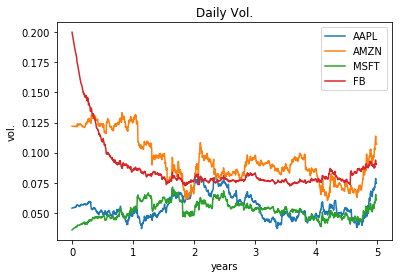

In [55]:
pd.concat([aapl_vol, amzn_vol, msft_vol, fb_vol], axis=1).set_index(years).plot()
plt.title('Daily Vol.')
plt.xlabel('years')
plt.ylabel('vol.')
# plt.savefig('./report/figs/tech_daily_vol')
plt.show()

# PF VGSA

In [56]:
mu_ = (0.01, 0.1)
kappa_ = (1, 3) # mean reversion rate
theta_ = (0.01, 0.1)
sigma_ = (0.5, 0.72)
nu_ = (0.02, 0.15)
eta_ = (1,10) # long-term rate of change
lda_ = (1,10) # time change vol

In [57]:
vgsa_params_bounds = [mu_, kappa_, theta_, sigma_, nu_, eta_, lda_]

In [58]:
num_particles = 2000
pf_vgsa = pf.PFVGSA(N=num_particles, dt=dt)

In [62]:
aapl_arrival = pf_vgsa.filter_arrival(aapl[1:]/aapl[:-1], vgsa_params_bounds, is_bounds=True)
amzn_arrival = pf_vgsa.filter_arrival(amzn[1:]/amzn[:-1], vgsa_params_bounds, is_bounds=True)
msft_arrival = pf_vgsa.filter_arrival(msft[1:]/msft[:-1], vgsa_params_bounds, is_bounds=True)
fb_arrival = pf_vgsa.filter_arrival(fb[1:]/fb[:-1], vgsa_params_bounds, is_bounds=True)

resampling since: 1.2597449926578523
num neg. arrival rate: 1
resampling since: 5.321172733154801
num neg. arrival rate: 163
resampling since: 16.247045787142298
num neg. arrival rate: 105
resampling since: 89.76538993812193
num neg. arrival rate: 197
resampling since: 89.72257462264359
num neg. arrival rate: 197
resampling since: 114.92624858577499
num neg. arrival rate: 178
resampling since: 20.432585977232456
num neg. arrival rate: 137
resampling since: 28.0330586847673
num neg. arrival rate: 164
resampling since: 86.0546339236354
num neg. arrival rate: 207
resampling since: 45.59701828058767
num neg. arrival rate: 149
resampling since: 305.5714076910502
num neg. arrival rate: 223
resampling since: 2.4647338878827525
num neg. arrival rate: 50
resampling since: 476.28292401830277
num neg. arrival rate: 289
resampling since: 4.866587639690455
num neg. arrival rate: 48
resampling since: 9.282223833617314
num neg. arrival rate: 153
resampling since: 26.568015824263586
num neg. arrival r

num neg. arrival rate: 147
resampling since: 1.9337081963946152
num neg. arrival rate: 24
resampling since: 928.6504052935736
num neg. arrival rate: 290
resampling since: 8.480888713754277
num neg. arrival rate: 83
resampling since: 265.623008855146
num neg. arrival rate: 267
resampling since: 36.904141127500026
num neg. arrival rate: 122
resampling since: 106.0839730489347
num neg. arrival rate: 194
resampling since: 72.37633742048094
num neg. arrival rate: 190
resampling since: 62.96111399216007
num neg. arrival rate: 172
resampling since: 3.9388185697065876
num neg. arrival rate: 56
resampling since: 4.807393506799089
num neg. arrival rate: 165
resampling since: 70.28425273189445
num neg. arrival rate: 246
resampling since: 28.58783434435545
num neg. arrival rate: 143
resampling since: 30.002928280001733
num neg. arrival rate: 156
resampling since: 127.31475517009255
num neg. arrival rate: 201
resampling since: 161.69233642015266
num neg. arrival rate: 206
resampling since: 172.8436

resampling since: 32.37680701583429
num neg. arrival rate: 169
resampling since: 136.0466838758264
num neg. arrival rate: 215
resampling since: 31.632347105610872
num neg. arrival rate: 144
resampling since: 7.005749406040663
num neg. arrival rate: 87
resampling since: 118.70125317275827
num neg. arrival rate: 268
resampling since: 24.231889653242142
num neg. arrival rate: 144
resampling since: 8.606018847116799
num neg. arrival rate: 145
resampling since: 322.6573504770759
num neg. arrival rate: 247
resampling since: 105.94768894832121
num neg. arrival rate: 190
resampling since: 40.09320039049375
num neg. arrival rate: 187
resampling since: 33.08596084817481
num neg. arrival rate: 195
resampling since: 11.8349001718938
num neg. arrival rate: 86
resampling since: 8.936736031438755
num neg. arrival rate: 166
resampling since: 110.8068403187837
num neg. arrival rate: 207
resampling since: 2.9680665451633073
num neg. arrival rate: 78
resampling since: 535.4736001941271
num neg. arrival r

resampling since: 40.7284288358966
num neg. arrival rate: 140
resampling since: 4.485606722492947
num neg. arrival rate: 100
resampling since: 16.78639919545131
num neg. arrival rate: 171
resampling since: 33.2203766190293
num neg. arrival rate: 197
resampling since: 122.75480845436606
num neg. arrival rate: 212
resampling since: 98.79448444827823
num neg. arrival rate: 206
resampling since: 11.227429783135724
num neg. arrival rate: 98
resampling since: 150.7362243398794
num neg. arrival rate: 267
resampling since: 52.31626940930178
num neg. arrival rate: 176
resampling since: 60.22922331906592
num neg. arrival rate: 176
resampling since: 25.351539834423054
num neg. arrival rate: 160
resampling since: 33.05367202936793
num neg. arrival rate: 136
resampling since: 43.19779858868048
num neg. arrival rate: 184
resampling since: 93.7931417355171
num neg. arrival rate: 171
resampling since: 19.60731918484775
num neg. arrival rate: 168
resampling since: 134.20136090243017
num neg. arrival ra

num neg. arrival rate: 45
resampling since: 406.2299087848294
num neg. arrival rate: 308
resampling since: 77.71725009062357
num neg. arrival rate: 174
resampling since: 4.093948056980342
num neg. arrival rate: 102
resampling since: 2.2781427971930674
num neg. arrival rate: 84
resampling since: 240.08318589382867
num neg. arrival rate: 265
resampling since: 10.801793860667908
num neg. arrival rate: 125
resampling since: 108.85684726980908
num neg. arrival rate: 214
resampling since: 31.185905346507358
num neg. arrival rate: 152
resampling since: 1.0536571907182328
num neg. arrival rate: 3
num neg. arrival rate: 344
resampling since: 10.558340411996182
num neg. arrival rate: 69
resampling since: 32.04257049592324
num neg. arrival rate: 184
resampling since: 96.19579737474267
num neg. arrival rate: 209
resampling since: 29.227508013523167
num neg. arrival rate: 131
resampling since: 147.72511987928172
num neg. arrival rate: 171
resampling since: 94.95586732521842
num neg. arrival rate: 2

resampling since: 2.3754392432305296
num neg. arrival rate: 64
resampling since: 379.73977706050516
num neg. arrival rate: 276
resampling since: 22.026310419488908
num neg. arrival rate: 119
resampling since: 170.81223623070673
num neg. arrival rate: 216
resampling since: 18.82805600815489
num neg. arrival rate: 146
resampling since: 13.461856488145257
num neg. arrival rate: 135
resampling since: 254.86308182390934
num neg. arrival rate: 247
resampling since: 8.34522573296921
num neg. arrival rate: 131
resampling since: 11.783071258978254
num neg. arrival rate: 172
resampling since: 6.306256053608249
num neg. arrival rate: 73
resampling since: 413.4318753262679
num neg. arrival rate: 297
resampling since: 54.15025050455035
num neg. arrival rate: 135
resampling since: 57.97267699099731
num neg. arrival rate: 180
resampling since: 139.87507020785878
num neg. arrival rate: 244
resampling since: 2.390491792427883
num neg. arrival rate: 62
resampling since: 256.91730196911885
num neg. arriv

num neg. arrival rate: 77
resampling since: 234.10595087135462
num neg. arrival rate: 255
resampling since: 133.7722732816216
num neg. arrival rate: 200
resampling since: 48.79847924864
num neg. arrival rate: 142
resampling since: 16.567417419147183
num neg. arrival rate: 133
resampling since: 74.24495445692624
num neg. arrival rate: 176
resampling since: 49.1617586316284
num neg. arrival rate: 148
resampling since: 75.83008620378884
num neg. arrival rate: 189
resampling since: 13.821207407352317
num neg. arrival rate: 144
resampling since: 50.744998275160356
num neg. arrival rate: 215
resampling since: 141.94882103879888
num neg. arrival rate: 233
resampling since: 7.0355898936299734
num neg. arrival rate: 110
resampling since: 44.74829846097381
num neg. arrival rate: 215
resampling since: 19.31269216931331
num neg. arrival rate: 106
resampling since: 54.33140242298413
num neg. arrival rate: 207
resampling since: 43.10836818843661
num neg. arrival rate: 158
resampling since: 242.02244

num neg. arrival rate: 179
resampling since: 58.808941524250486
num neg. arrival rate: 207
resampling since: 38.60434156292568
num neg. arrival rate: 171
resampling since: 32.94624816208936
num neg. arrival rate: 144
resampling since: 2.902260744465844
num neg. arrival rate: 75
resampling since: 198.11755529444997
num neg. arrival rate: 240
resampling since: 27.273464758453983
num neg. arrival rate: 165
resampling since: 4.051537825293687
num neg. arrival rate: 92
resampling since: 80.47461048937592
num neg. arrival rate: 251
resampling since: 50.95443654233043
num neg. arrival rate: 127
resampling since: 37.34980563282513
num neg. arrival rate: 203
resampling since: 193.09161289923185
num neg. arrival rate: 201
resampling since: 4.338053136597143
num neg. arrival rate: 90
resampling since: 227.39980307521233
num neg. arrival rate: 274
resampling since: 63.21739712384692
num neg. arrival rate: 167
resampling since: 56.30827642436942
num neg. arrival rate: 189
resampling since: 31.44629

num neg. arrival rate: 234
resampling since: 229.4430839081046
num neg. arrival rate: 216
resampling since: 8.127638742868761
num neg. arrival rate: 102
resampling since: 2.0428048236911653
num neg. arrival rate: 71
resampling since: 1.8370489750206431
num neg. arrival rate: 50
resampling since: 170.89677465361555
num neg. arrival rate: 248
resampling since: 11.682622270584712
num neg. arrival rate: 129
resampling since: 27.099817067417984
num neg. arrival rate: 162
resampling since: 190.16289719996914
num neg. arrival rate: 201
resampling since: 61.480208054255236
num neg. arrival rate: 180
resampling since: 181.98793870150692
num neg. arrival rate: 218
resampling since: 24.158441031645406
num neg. arrival rate: 127
resampling since: 80.81210332041861
num neg. arrival rate: 194
resampling since: 15.150959393143546
num neg. arrival rate: 93
resampling since: 246.09712642841617
num neg. arrival rate: 231
resampling since: 92.49846658971549
num neg. arrival rate: 169
resampling since: 50

resampling since: 131.47914326250108
num neg. arrival rate: 166
resampling since: 9.067235156888598
num neg. arrival rate: 93
resampling since: 87.71682408415828
num neg. arrival rate: 223
resampling since: 39.212336833844354
num neg. arrival rate: 183
resampling since: 212.5264774316417
num neg. arrival rate: 212
resampling since: 45.25046834890285
num neg. arrival rate: 161
resampling since: 103.15342163160794
num neg. arrival rate: 207
resampling since: 2.298821601974482
num neg. arrival rate: 42
resampling since: 290.9155429259989
num neg. arrival rate: 305
resampling since: 9.339396674642456
num neg. arrival rate: 87
resampling since: 58.58878296465955
num neg. arrival rate: 220
resampling since: 14.750607779736349
num neg. arrival rate: 99
resampling since: 11.12399933654608
num neg. arrival rate: 137
resampling since: 77.44744039745682
num neg. arrival rate: 206
resampling since: 22.988033068264173
num neg. arrival rate: 158
resampling since: 8.429170951929946
num neg. arrival r

num neg. arrival rate: 307
resampling since: 4.112250238302246
num neg. arrival rate: 122
resampling since: 298.5739580432004
num neg. arrival rate: 477
resampling since: 104.72751279509698
num neg. arrival rate: 322
resampling since: 16.191655933842373
num neg. arrival rate: 209
resampling since: 24.232891690923072
num neg. arrival rate: 280
resampling since: 5.6970086661622625
num neg. arrival rate: 163
resampling since: 119.52112886087616
num neg. arrival rate: 368
resampling since: 11.798217744976373
num neg. arrival rate: 200
resampling since: 61.581827662564145
num neg. arrival rate: 354
resampling since: 19.222738452222593
num neg. arrival rate: 228
resampling since: 444.4575071994584
num neg. arrival rate: 425
resampling since: 127.41944889493627
num neg. arrival rate: 294
resampling since: 2.9194046065503976
num neg. arrival rate: 128
resampling since: 13.71575154403494
num neg. arrival rate: 295
resampling since: 118.69367391583324
num neg. arrival rate: 349
resampling since:

num neg. arrival rate: 250
resampling since: 88.39194666324525
num neg. arrival rate: 355
resampling since: 175.95765510297892
num neg. arrival rate: 324
resampling since: 174.08659994126472
num neg. arrival rate: 351
resampling since: 137.1106819114666
num neg. arrival rate: 278
resampling since: 21.76547316444859
num neg. arrival rate: 263
resampling since: 254.21000759231697
num neg. arrival rate: 429
resampling since: 47.8586102752252
num neg. arrival rate: 265
resampling since: 87.51718548394184
num neg. arrival rate: 349
resampling since: 188.99678809058426
num neg. arrival rate: 346
resampling since: 216.03643102032575
num neg. arrival rate: 326
resampling since: 70.2896337942772
num neg. arrival rate: 267
resampling since: 73.41635829137871
num neg. arrival rate: 327
resampling since: 51.798526556851556
num neg. arrival rate: 244
resampling since: 17.503936697346525
num neg. arrival rate: 256
resampling since: 303.90640085954846
num neg. arrival rate: 416
resampling since: 5.57

num neg. arrival rate: 282
resampling since: 28.804373744704627
num neg. arrival rate: 223
resampling since: 302.34488099576214
num neg. arrival rate: 384
resampling since: 14.43026135228451
num neg. arrival rate: 255
resampling since: 96.70045598745554
num neg. arrival rate: 326
resampling since: 14.690515594771256
num neg. arrival rate: 216
resampling since: 84.1268670722805
num neg. arrival rate: 290
resampling since: 13.27048227275638
num neg. arrival rate: 192
resampling since: 130.6094122941197
num neg. arrival rate: 381
resampling since: 166.3487034600252
num neg. arrival rate: 332
resampling since: 32.608012593937936
num neg. arrival rate: 215
resampling since: 218.24083739654424
num neg. arrival rate: 353
resampling since: 43.19869977405634
num neg. arrival rate: 295
resampling since: 35.33431965860908
num neg. arrival rate: 297
resampling since: 111.16408454673741
num neg. arrival rate: 312
resampling since: 20.146413945370966
num neg. arrival rate: 302
resampling since: 68.5

resampling since: 16.61235118820216
num neg. arrival rate: 226
resampling since: 28.005952044690993
num neg. arrival rate: 254
resampling since: 158.66993403440017
num neg. arrival rate: 371
resampling since: 83.4494207357259
num neg. arrival rate: 342
resampling since: 83.00955557163724
num neg. arrival rate: 280
resampling since: 53.92210660051827
num neg. arrival rate: 295
resampling since: 11.317364947945434
num neg. arrival rate: 276
resampling since: 52.92057821910802
num neg. arrival rate: 314
resampling since: 78.76517905176125
num neg. arrival rate: 287
resampling since: 4.018130632861681
num neg. arrival rate: 178
resampling since: 26.628775289820318
num neg. arrival rate: 264
resampling since: 7.094208505203808
num neg. arrival rate: 158
resampling since: 167.08846027657933
num neg. arrival rate: 398
resampling since: 75.34995615823067
num neg. arrival rate: 281
resampling since: 20.45509469686256
num neg. arrival rate: 217
resampling since: 60.464251627838955
num neg. arriv

num neg. arrival rate: 270
resampling since: 15.073010321099003
num neg. arrival rate: 282
resampling since: 12.853370290944476
num neg. arrival rate: 251
resampling since: 330.45689683519225
num neg. arrival rate: 425
resampling since: 17.752601618052
num neg. arrival rate: 198
resampling since: 162.6085322479549
num neg. arrival rate: 341
resampling since: 61.08939567411675
num neg. arrival rate: 267
resampling since: 102.55591896024963
num neg. arrival rate: 331
resampling since: 3.660614609360831
num neg. arrival rate: 176
resampling since: 290.13484543751815
num neg. arrival rate: 422
resampling since: 5.808012764321002
num neg. arrival rate: 175
resampling since: 150.07097749288866
num neg. arrival rate: 361
resampling since: 127.5025158900446
num neg. arrival rate: 294
resampling since: 5.957777621601743
num neg. arrival rate: 166
resampling since: 86.87851084158096
num neg. arrival rate: 374
resampling since: 15.637700149442407
num neg. arrival rate: 247
resampling since: 361.7

resampling since: 79.8113755118859
num neg. arrival rate: 303
resampling since: 1.583801371377915
num neg. arrival rate: 51
resampling since: 792.1537284292648
num neg. arrival rate: 460
resampling since: 20.950463177901664
num neg. arrival rate: 220
resampling since: 50.29142494051999
num neg. arrival rate: 325
resampling since: 9.026948843852946
num neg. arrival rate: 135
resampling since: 69.16502372804634
num neg. arrival rate: 354
resampling since: 19.210906413903576
num neg. arrival rate: 247
resampling since: 45.205709081439345
num neg. arrival rate: 346
resampling since: 14.897618542275238
num neg. arrival rate: 274
resampling since: 142.3345028588262
num neg. arrival rate: 324
resampling since: 14.901157896307692
num neg. arrival rate: 200
resampling since: 12.732950347272048
num neg. arrival rate: 350
resampling since: 101.60867267846606
num neg. arrival rate: 329
resampling since: 10.738210929001095
num neg. arrival rate: 166
resampling since: 174.98277003718394
num neg. arr

num neg. arrival rate: 299
resampling since: 163.03396169694798
num neg. arrival rate: 323
resampling since: 3.154837302949399
num neg. arrival rate: 100
resampling since: 554.4414981216746
num neg. arrival rate: 454
resampling since: 9.658206007460837
num neg. arrival rate: 244
resampling since: 209.512000510389
num neg. arrival rate: 372
resampling since: 15.496946693348713
num neg. arrival rate: 261
resampling since: 45.8232653832088
num neg. arrival rate: 302
resampling since: 125.6133628735245
num neg. arrival rate: 361
resampling since: 31.127906034062118
num neg. arrival rate: 310
resampling since: 138.133882566296
num neg. arrival rate: 334
resampling since: 76.3612997376508
num neg. arrival rate: 330
resampling since: 101.074043306426
num neg. arrival rate: 327
resampling since: 4.1035180245842175
num neg. arrival rate: 131
resampling since: 70.26294950271084
num neg. arrival rate: 337
resampling since: 6.262288264701297
num neg. arrival rate: 137
resampling since: 635.8976012

resampling since: 1.8577601256782623
num neg. arrival rate: 121
resampling since: 113.42907167213441
num neg. arrival rate: 394
resampling since: 167.4772814354575
num neg. arrival rate: 340
resampling since: 133.94842251562648
num neg. arrival rate: 326
resampling since: 4.899495731433442
num neg. arrival rate: 166
resampling since: 42.09807800395556
num neg. arrival rate: 336
resampling since: 35.92687752445799
num neg. arrival rate: 220
resampling since: 28.59874514928916
num neg. arrival rate: 266
resampling since: 86.93173120809449
num neg. arrival rate: 276
resampling since: 64.42399404777433
num neg. arrival rate: 301
resampling since: 174.88701152065093
num neg. arrival rate: 351
resampling since: 134.81951397299466
num neg. arrival rate: 295
resampling since: 130.07342291873752
num neg. arrival rate: 308
resampling since: 20.83328691556516
num neg. arrival rate: 231
resampling since: 16.834380975067866
num neg. arrival rate: 255
resampling since: 31.279784317925714
num neg. ar

num neg. arrival rate: 382
resampling since: 158.0862596623028
num neg. arrival rate: 328
resampling since: 86.23161396020107
num neg. arrival rate: 251
resampling since: 1.4047399918761443
num neg. arrival rate: 60
resampling since: 160.65607941495193
num neg. arrival rate: 412
resampling since: 56.11769354027207
num neg. arrival rate: 269
resampling since: 72.83967031851873
num neg. arrival rate: 309
resampling since: 120.62737564418211
num neg. arrival rate: 350
resampling since: 7.247155831717264
num neg. arrival rate: 217
resampling since: 9.319575227045814
num neg. arrival rate: 178
resampling since: 316.38871014353344
num neg. arrival rate: 463
resampling since: 113.4556850811912
num neg. arrival rate: 272
resampling since: 15.618161273376336
num neg. arrival rate: 244
resampling since: 74.96044640082691
num neg. arrival rate: 304
resampling since: 111.04864756067407
num neg. arrival rate: 303
resampling since: 307.2570634260737
num neg. arrival rate: 374
resampling since: 18.24

num neg. arrival rate: 193
resampling since: 96.64599777479033
num neg. arrival rate: 211
resampling since: 76.67596371462503
num neg. arrival rate: 152
resampling since: 1.2318751463640019
num neg. arrival rate: 14
resampling since: 589.0353429772312
num neg. arrival rate: 339
resampling since: 2.236203710719552
num neg. arrival rate: 33
resampling since: 471.82754636175076
num neg. arrival rate: 300
resampling since: 17.53278071746701
num neg. arrival rate: 126
resampling since: 86.13384035396528
num neg. arrival rate: 221
resampling since: 67.85820465521005
num neg. arrival rate: 190
resampling since: 96.80234006231603
num neg. arrival rate: 186
resampling since: 72.37936515065334
num neg. arrival rate: 197
resampling since: 7.959552021533775
num neg. arrival rate: 125
resampling since: 186.96298840288333
num neg. arrival rate: 246
resampling since: 15.812989386741632
num neg. arrival rate: 139
resampling since: 412.43087769659195
num neg. arrival rate: 274
resampling since: 59.2643

num neg. arrival rate: 136
resampling since: 21.43542030509351
num neg. arrival rate: 159
resampling since: 116.08140415609346
num neg. arrival rate: 246
resampling since: 63.30630326810951
num neg. arrival rate: 176
resampling since: 144.74809592842828
num neg. arrival rate: 241
resampling since: 16.117602757511246
num neg. arrival rate: 139
resampling since: 67.6036267191561
num neg. arrival rate: 227
resampling since: 4.639419924569726
num neg. arrival rate: 84
resampling since: 489.4349366132446
num neg. arrival rate: 297
resampling since: 97.38509204906661
num neg. arrival rate: 211
resampling since: 187.54532430508655
num neg. arrival rate: 217
resampling since: 172.47033819364847
num neg. arrival rate: 210
resampling since: 19.27154989142022
num neg. arrival rate: 160
resampling since: 80.4322640183117
num neg. arrival rate: 228
resampling since: 2.8771896186684507
num neg. arrival rate: 74
resampling since: 274.54025408728756
num neg. arrival rate: 299
resampling since: 96.7413

resampling since: 1.6583641422983104
num neg. arrival rate: 39
resampling since: 192.09919596511673
num neg. arrival rate: 308
resampling since: 6.299424632465257
num neg. arrival rate: 86
resampling since: 368.43593218640325
num neg. arrival rate: 295
resampling since: 83.7043951880523
num neg. arrival rate: 165
resampling since: 24.828178131650677
num neg. arrival rate: 197
resampling since: 68.50788247498798
num neg. arrival rate: 237
resampling since: 20.757823809693136
num neg. arrival rate: 156
resampling since: 333.8568608459291
num neg. arrival rate: 258
resampling since: 1.9228623655744708
num neg. arrival rate: 42
resampling since: 14.121042284487375
num neg. arrival rate: 241
resampling since: 18.074263083780046
num neg. arrival rate: 143
resampling since: 156.37856161259
num neg. arrival rate: 271
resampling since: 146.8597584186817
num neg. arrival rate: 204
resampling since: 106.53794054073097
num neg. arrival rate: 180
resampling since: 51.88550278917791
num neg. arrival

num neg. arrival rate: 153
resampling since: 77.06828812756162
num neg. arrival rate: 210
resampling since: 266.78006151246433
num neg. arrival rate: 231
resampling since: 239.25508267137775
num neg. arrival rate: 220
resampling since: 104.28848098803036
num neg. arrival rate: 179
resampling since: 105.17218024082827
num neg. arrival rate: 230
resampling since: 48.40286295892652
num neg. arrival rate: 196
resampling since: 75.50762415998395
num neg. arrival rate: 210
resampling since: 51.66618537296165
num neg. arrival rate: 208
resampling since: 186.5804788885204
num neg. arrival rate: 262
resampling since: 14.863441914246495
num neg. arrival rate: 138
resampling since: 162.6654898150196
num neg. arrival rate: 227
resampling since: 17.219575862266502
num neg. arrival rate: 150
resampling since: 155.55412752714247
num neg. arrival rate: 200
resampling since: 28.738369931257466
num neg. arrival rate: 141
resampling since: 2.0348108560685376
num neg. arrival rate: 75
resampling since: 47

num neg. arrival rate: 94
resampling since: 207.95648350460647
num neg. arrival rate: 274
resampling since: 15.874159894510973
num neg. arrival rate: 118
resampling since: 376.7221106219831
num neg. arrival rate: 280
resampling since: 17.3242335625951
num neg. arrival rate: 102
resampling since: 188.29901364212387
num neg. arrival rate: 251
resampling since: 21.475490911513962
num neg. arrival rate: 110
resampling since: 59.72860447221694
num neg. arrival rate: 230
resampling since: 33.533408388905656
num neg. arrival rate: 141
resampling since: 6.98014894708552
num neg. arrival rate: 113
resampling since: 232.84345437620092
num neg. arrival rate: 250
resampling since: 19.68605739576521
num neg. arrival rate: 152
resampling since: 240.78454022480508
num neg. arrival rate: 250
resampling since: 25.26490154574938
num neg. arrival rate: 131
resampling since: 64.63662262216417
num neg. arrival rate: 174
resampling since: 61.90286368338842
num neg. arrival rate: 189
resampling since: 25.232

resampling since: 12.231049851288454
num neg. arrival rate: 150
resampling since: 1.5729894698365476
num neg. arrival rate: 43
resampling since: 481.2237140421141
num neg. arrival rate: 307
resampling since: 25.847900748698574
num neg. arrival rate: 153
resampling since: 303.3149280106767
num neg. arrival rate: 244
resampling since: 51.59320438459786
num neg. arrival rate: 180
resampling since: 300.17010113960237
num neg. arrival rate: 247
resampling since: 100.31197583003203
num neg. arrival rate: 207
resampling since: 4.6641953712209565
num neg. arrival rate: 69
resampling since: 301.3041586637736
num neg. arrival rate: 298
resampling since: 3.6730695431536105
num neg. arrival rate: 79
resampling since: 440.07093678015684
num neg. arrival rate: 278
resampling since: 115.15061572524588
num neg. arrival rate: 147
resampling since: 3.5842337718187256
num neg. arrival rate: 102
resampling since: 180.58302300669638
num neg. arrival rate: 296
resampling since: 64.06684684347461
num neg. ar

resampling since: 33.335213048410836
num neg. arrival rate: 162
resampling since: 331.86829218054083
num neg. arrival rate: 253
resampling since: 58.3012197069381
num neg. arrival rate: 129
resampling since: 58.174978417633554
num neg. arrival rate: 156
resampling since: 15.637223384193211
num neg. arrival rate: 172
resampling since: 6.104090167152254
num neg. arrival rate: 124
resampling since: 312.69994748401786
num neg. arrival rate: 269
resampling since: 78.72530036140365
num neg. arrival rate: 186
resampling since: 93.34504964538718
num neg. arrival rate: 204
resampling since: 33.800034771646466
num neg. arrival rate: 181
resampling since: 58.196742865753045
num neg. arrival rate: 165
resampling since: 25.14662496146257
num neg. arrival rate: 179
resampling since: 7.805027887163974
num neg. arrival rate: 172
resampling since: 9.850347628470917
num neg. arrival rate: 170
resampling since: 59.3470672522564
num neg. arrival rate: 172
resampling since: 51.49902985759212
num neg. arriv

resampling since: 7.343694253150128
num neg. arrival rate: 149
resampling since: 286.2537728220564
num neg. arrival rate: 288
resampling since: 23.823011663966515
num neg. arrival rate: 133
resampling since: 6.059060840483917
num neg. arrival rate: 134
resampling since: 392.62370516340314
num neg. arrival rate: 296
resampling since: 9.145295149512334
num neg. arrival rate: 78
resampling since: 57.623384475245665
num neg. arrival rate: 212
resampling since: 1.3483774985419161
num neg. arrival rate: 22
resampling since: 143.98500928903906
num neg. arrival rate: 285
resampling since: 17.48709356658988
num neg. arrival rate: 155
resampling since: 28.668889611030252
num neg. arrival rate: 176
resampling since: 10.48255297485792
num neg. arrival rate: 137
resampling since: 175.59915538208023
num neg. arrival rate: 263
resampling since: 6.682618894190416
num neg. arrival rate: 104
resampling since: 122.78692235149526
num neg. arrival rate: 264
resampling since: 59.80583364420411
num neg. arri

num neg. arrival rate: 298
resampling since: 52.99101548807616
num neg. arrival rate: 187
resampling since: 4.308700245185265
num neg. arrival rate: 132
resampling since: 170.71103512538232
num neg. arrival rate: 242
resampling since: 55.93686404536133
num neg. arrival rate: 163
resampling since: 91.36483227957449
num neg. arrival rate: 203
resampling since: 2.1539907969390253
num neg. arrival rate: 61
resampling since: 5.34054986095018
num neg. arrival rate: 144
resampling since: 136.77068797839289
num neg. arrival rate: 243
resampling since: 5.933284537838742
num neg. arrival rate: 81
resampling since: 315.6422393761291
num neg. arrival rate: 275
resampling since: 37.78638689167574
num neg. arrival rate: 138
resampling since: 45.95562269484007
num neg. arrival rate: 168
resampling since: 4.81399355348905
num neg. arrival rate: 109
resampling since: 81.42812665714027
num neg. arrival rate: 213
resampling since: 47.40306101451895
num neg. arrival rate: 208
resampling since: 54.51928530

num neg. arrival rate: 239
resampling since: 78.92387970278172
num neg. arrival rate: 183
resampling since: 7.352126347705962
num neg. arrival rate: 142
resampling since: 12.059749610874933
num neg. arrival rate: 140
resampling since: 60.10720862771549
num neg. arrival rate: 250
resampling since: 15.160345509958802
num neg. arrival rate: 115
resampling since: 55.46176961950855
num neg. arrival rate: 239
resampling since: 220.77276838169252
num neg. arrival rate: 232
resampling since: 54.92626804034912
num neg. arrival rate: 209
resampling since: 8.808721846038775
num neg. arrival rate: 108
resampling since: 19.40826835110719
num neg. arrival rate: 212
resampling since: 60.66355817095055
num neg. arrival rate: 197
resampling since: 16.93672185015486
num neg. arrival rate: 165
resampling since: 204.78987254735452
num neg. arrival rate: 270
resampling since: 38.618935996413875
num neg. arrival rate: 148
resampling since: 95.76072892596918
num neg. arrival rate: 225
resampling since: 4.267

resampling since: 180.18746249744885
num neg. arrival rate: 316
resampling since: 77.08364363675761
num neg. arrival rate: 328
resampling since: 130.0735156687993
num neg. arrival rate: 361
resampling since: 42.21427328964325
num neg. arrival rate: 303
resampling since: 11.204621803777453
num neg. arrival rate: 170
resampling since: 39.12655825458677
num neg. arrival rate: 282
resampling since: 205.09867293303702
num neg. arrival rate: 385
resampling since: 5.136245402963094
num neg. arrival rate: 182
resampling since: 249.66407404521365
num neg. arrival rate: 418
resampling since: 35.10759183970142
num neg. arrival rate: 228
resampling since: 254.62659715077535
num neg. arrival rate: 401
resampling since: 31.347686213297624
num neg. arrival rate: 231
resampling since: 55.90217693021519
num neg. arrival rate: 307
resampling since: 81.96360700288943
num neg. arrival rate: 347
resampling since: 142.90107254384515
num neg. arrival rate: 399
resampling since: 55.572315868916434
num neg. ar

resampling since: 139.5010553964205
num neg. arrival rate: 345
resampling since: 29.501834113857566
num neg. arrival rate: 213
resampling since: 42.32234605804219
num neg. arrival rate: 301
resampling since: 219.54354483237043
num neg. arrival rate: 399
resampling since: 1.0076266352053675
num neg. arrival rate: 2
num neg. arrival rate: 522
resampling since: 59.79289937703705
num neg. arrival rate: 251
resampling since: 68.08025324456285
num neg. arrival rate: 291
resampling since: 14.487827432241943
num neg. arrival rate: 222
resampling since: 9.109567180065675
num neg. arrival rate: 207
resampling since: 1.5379943384058101
num neg. arrival rate: 65
resampling since: 389.6180243941475
num neg. arrival rate: 472
resampling since: 1.0961177649757816
num neg. arrival rate: 7
num neg. arrival rate: 503
resampling since: 62.595730583152445
num neg. arrival rate: 269
resampling since: 31.825584336818142
num neg. arrival rate: 298
resampling since: 111.2524072145991
num neg. arrival rate: 32

resampling since: 28.352716251656712
num neg. arrival rate: 273
resampling since: 20.529761324798987
num neg. arrival rate: 259
resampling since: 16.344843600922374
num neg. arrival rate: 247
resampling since: 95.35538275863289
num neg. arrival rate: 346
resampling since: 24.44823287561836
num neg. arrival rate: 313
resampling since: 24.877888296402194
num neg. arrival rate: 210
resampling since: 87.28069744407156
num neg. arrival rate: 408
resampling since: 7.569873497991901
num neg. arrival rate: 91
resampling since: 69.98593050913716
num neg. arrival rate: 400
resampling since: 121.56973955699975
num neg. arrival rate: 338
resampling since: 27.437164828196703
num neg. arrival rate: 294
resampling since: 164.16527766679434
num neg. arrival rate: 398
resampling since: 3.5414332764816194
num neg. arrival rate: 66
resampling since: 240.1948511630905
num neg. arrival rate: 451
resampling since: 5.648717975279252
num neg. arrival rate: 155
resampling since: 305.1517398481965
num neg. arri

resampling since: 25.54322708975172
num neg. arrival rate: 243
resampling since: 19.87011193268847
num neg. arrival rate: 271
resampling since: 52.280134075296
num neg. arrival rate: 306
resampling since: 20.796409735062998
num neg. arrival rate: 258
resampling since: 80.49956843584097
num neg. arrival rate: 341
resampling since: 15.17730059903328
num neg. arrival rate: 258
resampling since: 121.482829890565
num neg. arrival rate: 332
resampling since: 25.84446082345488
num neg. arrival rate: 239
resampling since: 49.02593789787302
num neg. arrival rate: 310
resampling since: 125.43064467374784
num neg. arrival rate: 383
resampling since: 11.16572713619302
num neg. arrival rate: 161
resampling since: 62.73245331886287
num neg. arrival rate: 392
resampling since: 135.671779696015
num neg. arrival rate: 354
resampling since: 1.052011551837914
num neg. arrival rate: 8
num neg. arrival rate: 499
resampling since: 11.798467784936811
num neg. arrival rate: 172
resampling since: 101.037992556

resampling since: 36.078270673633575
num neg. arrival rate: 299
resampling since: 108.1891889923793
num neg. arrival rate: 348
resampling since: 144.7125564694478
num neg. arrival rate: 308
resampling since: 35.871540045104055
num neg. arrival rate: 291
resampling since: 347.707018863408
num neg. arrival rate: 415
resampling since: 74.78934403484534
num neg. arrival rate: 293
resampling since: 99.11456716225281
num neg. arrival rate: 301
resampling since: 73.8964975054494
num neg. arrival rate: 332
resampling since: 18.866638437078553
num neg. arrival rate: 267
resampling since: 53.83104486269259
num neg. arrival rate: 289
resampling since: 31.195733078673673
num neg. arrival rate: 303
resampling since: 38.48979350614476
num neg. arrival rate: 290
resampling since: 19.745196939049997
num neg. arrival rate: 250
resampling since: 150.11941163917655
num neg. arrival rate: 423
resampling since: 27.939681256109903
num neg. arrival rate: 197
resampling since: 141.9141163736159
num neg. arriv

resampling since: 103.05124773329247
num neg. arrival rate: 369
resampling since: 59.877632178625674
num neg. arrival rate: 264
resampling since: 138.16507265229606
num neg. arrival rate: 389
resampling since: 49.04746631516594
num neg. arrival rate: 243
resampling since: 158.61314133870172
num neg. arrival rate: 368
resampling since: 77.8572534208295
num neg. arrival rate: 298
resampling since: 129.06704175129067
num neg. arrival rate: 328
resampling since: 200.06338858709006
num neg. arrival rate: 329
resampling since: 202.00387831480265
num neg. arrival rate: 356
resampling since: 72.50236966872693
num neg. arrival rate: 317
resampling since: 111.76073993240593
num neg. arrival rate: 321
resampling since: 1.26468285667301
num neg. arrival rate: 22
resampling since: 760.7949502450821
num neg. arrival rate: 469
resampling since: 8.63537463308872
num neg. arrival rate: 161
resampling since: 29.06914598151014
num neg. arrival rate: 263
resampling since: 14.02528508991782
num neg. arriva

num neg. arrival rate: 181
resampling since: 3.4698373112054903
num neg. arrival rate: 184
resampling since: 49.065118574800245
num neg. arrival rate: 303
resampling since: 159.5605486019988
num neg. arrival rate: 375
resampling since: 77.95059229141468
num neg. arrival rate: 299
resampling since: 6.530437709282495
num neg. arrival rate: 168
resampling since: 253.16606552733978
num neg. arrival rate: 388
resampling since: 4.5740473503626715
num neg. arrival rate: 147
resampling since: 92.01295356287552
num neg. arrival rate: 416
resampling since: 128.58952730063766
num neg. arrival rate: 333
resampling since: 7.457294452098091
num neg. arrival rate: 199
resampling since: 35.77117233492751
num neg. arrival rate: 296
resampling since: 17.236574412936136
num neg. arrival rate: 205
resampling since: 214.63733947592124
num neg. arrival rate: 435
resampling since: 88.04007706172031
num neg. arrival rate: 351
resampling since: 69.01379098853175
num neg. arrival rate: 259
resampling since: 2.1

resampling since: 37.23036539361794
num neg. arrival rate: 267
resampling since: 7.018714820877765
num neg. arrival rate: 240
resampling since: 196.52610602741225
num neg. arrival rate: 402
resampling since: 48.788713151692725
num neg. arrival rate: 276
resampling since: 58.460802377697775
num neg. arrival rate: 302
resampling since: 62.918916266625224
num neg. arrival rate: 304
resampling since: 15.983175441570564
num neg. arrival rate: 255
resampling since: 217.41960449956463
num neg. arrival rate: 384
resampling since: 26.547852706993368
num neg. arrival rate: 226
resampling since: 19.500228255183078
num neg. arrival rate: 260
resampling since: 121.12459145813355
num neg. arrival rate: 352
resampling since: 19.084995122318308
num neg. arrival rate: 252
resampling since: 222.0795858128754
num neg. arrival rate: 366
resampling since: 51.484231057736054
num neg. arrival rate: 282
resampling since: 24.709484467669714
num neg. arrival rate: 258
resampling since: 3.518392352315059
num neg

num neg. arrival rate: 378
resampling since: 1.587670433369936
num neg. arrival rate: 61
resampling since: 982.7449580695959
num neg. arrival rate: 484
resampling since: 40.90197698170136
num neg. arrival rate: 273
resampling since: 84.56043258766455
num neg. arrival rate: 270
resampling since: 46.14515712341067
num neg. arrival rate: 244
resampling since: 115.28813239796047
num neg. arrival rate: 296
resampling since: 4.27330183089463
num neg. arrival rate: 147
resampling since: 233.3704255251089
num neg. arrival rate: 408
resampling since: 13.261117955556252
num neg. arrival rate: 214
resampling since: 12.07429506722839
num neg. arrival rate: 295
resampling since: 26.797325716151285
num neg. arrival rate: 253
resampling since: 19.889126213315162
num neg. arrival rate: 255
resampling since: 180.8440237086916
num neg. arrival rate: 385
resampling since: 119.41860262287581
num neg. arrival rate: 337
resampling since: 73.42159770666841
num neg. arrival rate: 290
resampling since: 22.7905